# Exploratory Data Analysis 

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Calculations
from math import floor

#For Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

# For Validation
from sklearn.metrics import mean_squared_error, accuracy_score

# For Storing Models
import pickle
%matplotlib inline

# For Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import os
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Basic libraries for one-hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


__Import the original dataset__

In [3]:
# Reading data
listings = pd.read_csv('dataset_origin\listings.csv')
listings.shape

(3818, 92)

Check the vital statistics of the dataset using the type and shape attributes.

In [4]:
print("Data type : ", type(listings))
print("Data dims : ", listings.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


Check the variables (and their types) in the dataset using the dtypes attribute.

In [5]:
print(listings.dtypes)

id                                    int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null float64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      34

__Sort the dataset into numerical and categorical data__

In [7]:
numerical_data = listings.select_dtypes(include=[np.number])
categorical_data = listings.select_dtypes(exclude=[np.number])

__Int and Float type__

In [8]:
numerical_data.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


__Strings/Object types__

In [9]:
categorical_data.describe()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3477,3119,3742,1,2506,1994,2574,...,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/9329068,4/1/2016,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,...,t,4/1/2016,21/9/2015,2/1/2016,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [10]:
categorical_data.shape
categorical_data

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,4/1/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,4/1/2016,1/11/2011,2/1/2016,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,4/1/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,4/1/2016,19/8/2013,29/12/2015,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,4/1/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,4/1/2016,30/7/2014,3/9/2015,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,4/1/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,4/1/2016,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,4/1/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,4/1/2016,10/7/2012,24/10/2015,f,WASHINGTON,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,https://www.airbnb.com/rooms/8101950,4/1/2016,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,NaN,...,t,4/1/2016,27/9/2015,27/9/2015,f,WASHINGTON,f,strict,f,f
3814,https://www.airbnb.com/rooms/8902327,4/1/2016,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,...,t,4/1/2016,18/12/2015,24/12/2015,f,WASHINGTON,f,moderate,f,f
3815,https://www.airbnb.com/rooms/10267360,4/1/2016,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,...,t,4/1/2016,NaN,NaN,f,WASHINGTON,f,moderate,f,f
3816,https://www.airbnb.com/rooms/9604740,4/1/2016,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,...,t,4/1/2016,NaN,NaN,f,WASHINGTON,f,moderate,f,f


Our question is about price, so firstly we extract a single variable "price"

In [11]:
#We first check the data type of "price"
print(listings['price'].dtypes)

object


# Merge neighbor_score into listings dataset

In [12]:
# Reading data
seattle_neighborScore = pd.read_csv('dataset_origin\seattle_neighborScore.csv')
seattle_neighborScore.shape
print("Data type : ", type(seattle_neighborScore))
print("Data dims : ", seattle_neighborScore.shape)
print(seattle_neighborScore.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (86, 6)
Rank#             int64
Name             object
Walk Score        int64
Transit Score     int64
Bike Score        int64
Population       object
dtype: object


In [14]:
numerical_data = seattle_neighborScore.select_dtypes(include=[np.number])
categorical_data = seattle_neighborScore.select_dtypes(exclude=[np.number])
numerical_data.describe()


,Rank#,Walk Score,Transit Score,Bike Score
count,86.000000,86.000000,86.000000,86.00000
mean,43.500000,70.000000,58.139535,67.55814
std,24.969982,17.052859,15.640944,13.20927
min,1.000000,23.000000,34.000000,26.00000
25%,22.250000,58.250000,48.000000,60.00000
50%,43.500000,71.000000,54.500000,69.50000
75%,64.750000,82.750000,62.750000,77.00000
max,86.000000,98.000000,100.000000,89.00000


In [15]:
categorical_data

,Name,Population
0,Downtown,"5,059"
1,International District,"3,396"
2,Belltown,"14,163"
3,First Hill,"9,294"
4,Pioneer Square,"4,159"
...,...,...
81,View Ridge,"5,246"
82,Arbor Heights,"5,056"
83,Riverview,"3,861"
84,Matthews Beach,"6,225"


Notice that Population can be converted to float type

In [16]:

seattle_neighborScore['Population'] = seattle_neighborScore['Population'].apply(lambda x: "".join(x.split(','))).astype('float')
numerical_data = seattle_neighborScore.select_dtypes(include=[np.number])
categorical_data = seattle_neighborScore.select_dtypes(exclude=[np.number])
categorical_data

,Name
0,Downtown
1,International District
2,Belltown
3,First Hill
4,Pioneer Square
...,...
81,View Ridge
82,Arbor Heights
83,Riverview
84,Matthews Beach


In [17]:
seattle_neighborScore.loc['86'] = seattle_neighborScore.apply(lambda x: x.sum())
seattle_neighborScore

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population
0,1,Downtown,98,100,72,5059.0
1,2,International District,98,100,80,3396.0
2,3,Belltown,98,99,75,14163.0
3,4,First Hill,98,99,78,9294.0
4,5,Pioneer Square,98,100,77,4159.0
...,...,...,...,...,...,...
82,83,Arbor Heights,38,43,32,5056.0
83,84,Riverview,37,45,57,3861.0
84,85,Matthews Beach,35,44,50,6225.0
85,86,Rainier View,23,42,26,4081.0


In [18]:
#Modify that row
seattle_neighborScore.loc[86, ['Rank#']]=87
seattle_neighborScore.loc[86, ['Name']]='Other neighborhoods'
seattle_neighborScore.loc[86, ['Walk Score']]=6020/85
seattle_neighborScore.loc[86, ['Transit Score']]=5000/85
seattle_neighborScore.loc[86, ['Bike Score']]=5810/85
seattle_neighborScore.loc[86, ['Population']]=606310/85
#delete useless row
seattle_neighborScore.drop(index=(seattle_neighborScore.loc[(seattle_neighborScore['Rank#']==3741.0)].index))

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population
0,1.0,Downtown,98.000000,100.000000,72.000000,5059.000000
1,2.0,International District,98.000000,100.000000,80.000000,3396.000000
2,3.0,Belltown,98.000000,99.000000,75.000000,14163.000000
3,4.0,First Hill,98.000000,99.000000,78.000000,9294.000000
4,5.0,Pioneer Square,98.000000,100.000000,77.000000,4159.000000
...,...,...,...,...,...,...
82,83.0,Arbor Heights,38.000000,43.000000,32.000000,5056.000000
83,84.0,Riverview,37.000000,45.000000,57.000000,3861.000000
84,85.0,Matthews Beach,35.000000,44.000000,50.000000,6225.000000
85,86.0,Rainier View,23.000000,42.000000,26.000000,4081.000000


In [19]:
seattle_neighborScore['Name'] = seattle_neighborScore['Name'].str.replace('West Queen Anne', 'Queen Anne')
seattle_neighborScore['Name'] = seattle_neighborScore['Name'].str.replace('Central District', 'Central Area')
seattle_neighborScore['Name'] = seattle_neighborScore['Name'].str.replace('Southeast Magnolia', 'Magnolia',regex=True)
seattle_neighborScore[seattle_neighborScore['Name']=='Queen Anne']
seattle_neighborScore[seattle_neighborScore['Name']=='Magnolia']

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population
49,50.0,Magnolia,68.0,44.0,67.0,4891.0


In [20]:
listings=pd.merge(seattle_neighborScore, listings, how='right', left_on=['Name'], right_on=['neighbourhood_cleansed'])
listings

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population,id,listing_url,scrape_id,last_scraped,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2.0,International District,98.0,100.0,80.0,3396.0,365550,https://www.airbnb.com/rooms/365550,2.016010e+13,4/1/2016,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,10.12
1,2.0,International District,98.0,100.0,80.0,3396.0,7777381,https://www.airbnb.com/rooms/7777381,2.016010e+13,4/1/2016,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,3.50
2,2.0,International District,98.0,100.0,80.0,3396.0,1778989,https://www.airbnb.com/rooms/1778989,2.016010e+13,4/1/2016,...,9.0,f,NaN,WASHINGTON,t,moderate,t,t,2,2.31
3,2.0,International District,98.0,100.0,80.0,3396.0,5031285,https://www.airbnb.com/rooms/5031285,2.016010e+13,4/1/2016,...,9.0,f,NaN,WASHINGTON,t,flexible,f,f,2,8.05
4,2.0,International District,98.0,100.0,80.0,3396.0,5031383,https://www.airbnb.com/rooms/5031383,2.016010e+13,4/1/2016,...,9.0,f,NaN,WASHINGTON,t,flexible,f,f,2,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,NaN,NaN,NaN,NaN,NaN,2778101,https://www.airbnb.com/rooms/2778101,2.016010e+13,4/1/2016,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.73
3814,NaN,NaN,NaN,NaN,NaN,NaN,10019082,https://www.airbnb.com/rooms/10019082,2.016010e+13,4/1/2016,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
3815,NaN,NaN,NaN,NaN,NaN,NaN,6586979,https://www.airbnb.com/rooms/6586979,2.016010e+13,4/1/2016,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,10,3.37
3816,NaN,NaN,NaN,NaN,NaN,NaN,9618016,https://www.airbnb.com/rooms/9618016,2.016010e+13,4/1/2016,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


We find that "price " is categorical data, so we need to convert it to float type before we do some plots

In [21]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
numerical_data = listings.select_dtypes(include=[np.number])

In [22]:
price = pd.DataFrame(listings['price'])
print("Data type : ", type(price))
print("Data dims : ", price.size)
print(price.dtypes)
price.head()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  3818
price    float64
dtype: object


,price
0,89.0
1,80.0
2,120.0
3,40.0
4,40.0


In [23]:
price.describe()

,price
count,3818.000000
mean,127.976166
std,90.250022
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,1000.000000


In [24]:
price.median()

price    100.0
dtype: float64

## Check the Summary Statistics by doing various plots

using a standard boxplot

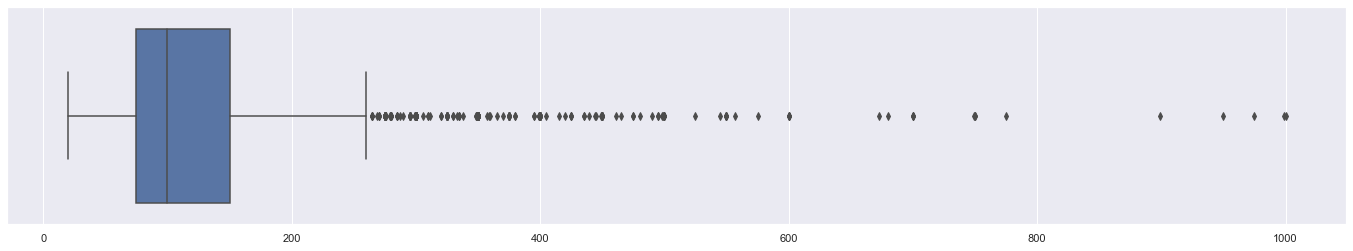

In [25]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(price, orient = "h")

A simple displot to visualize the complete distribution of the price

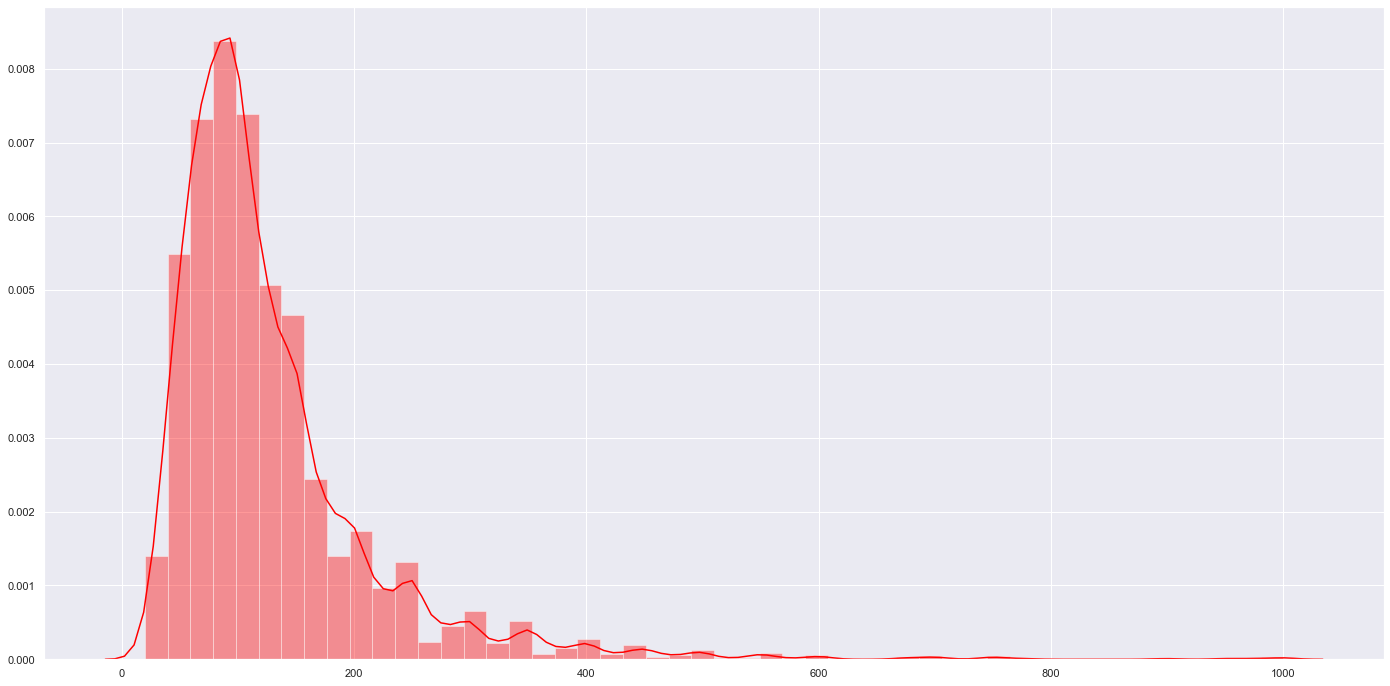

In [26]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(price, color = "red")

# Numerical Variables

# Box-Plot All Numeric Variables 


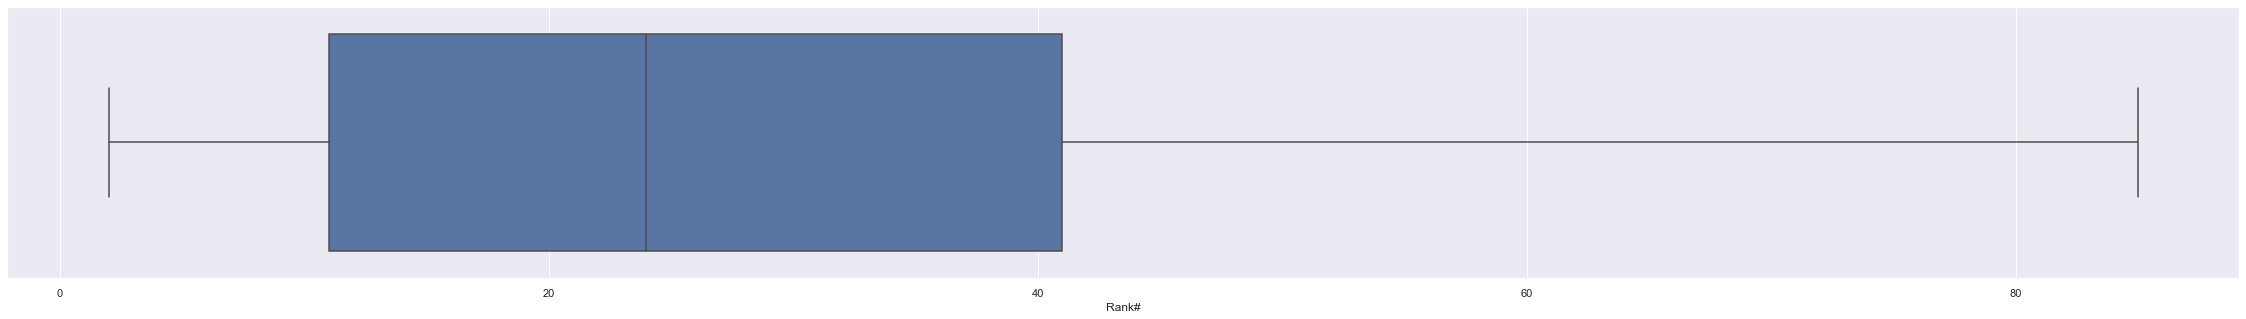

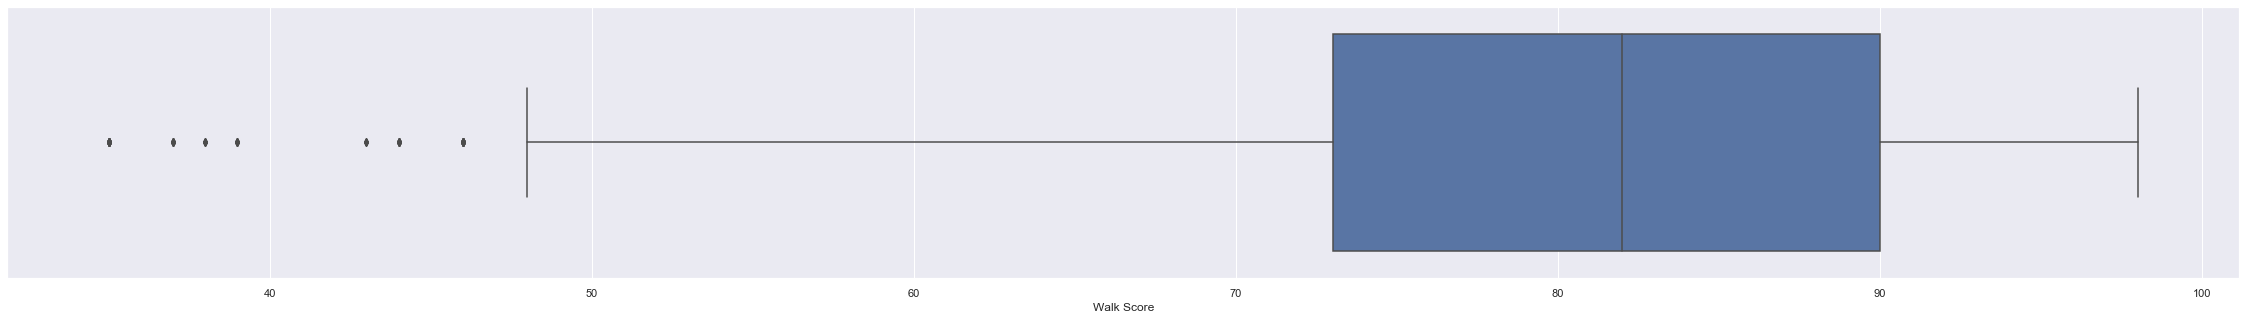

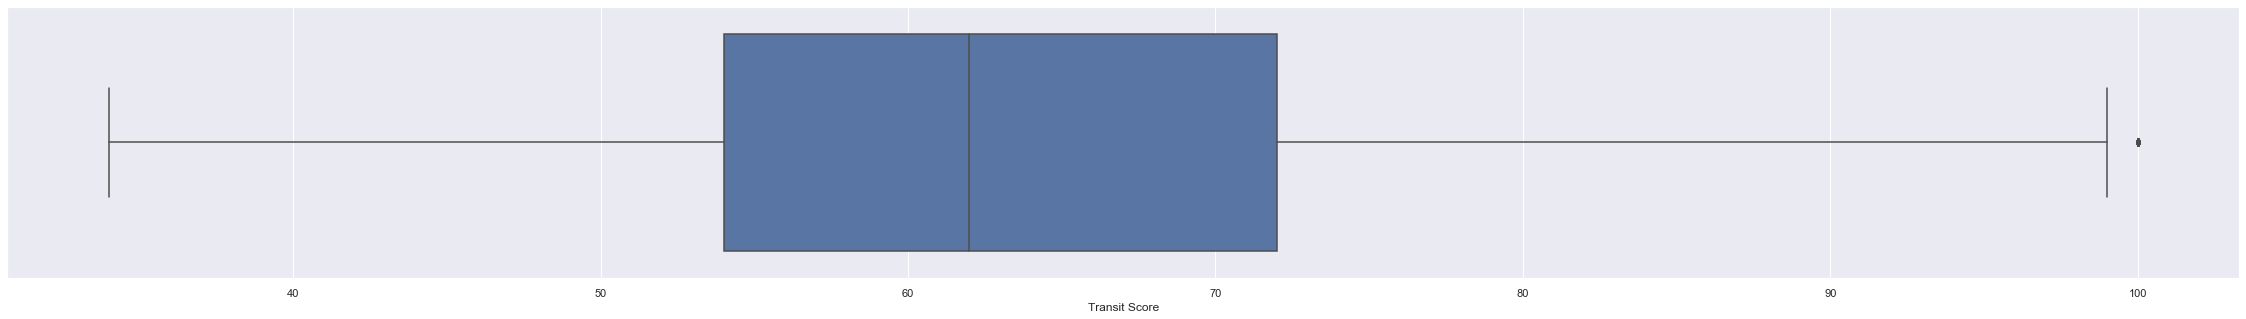

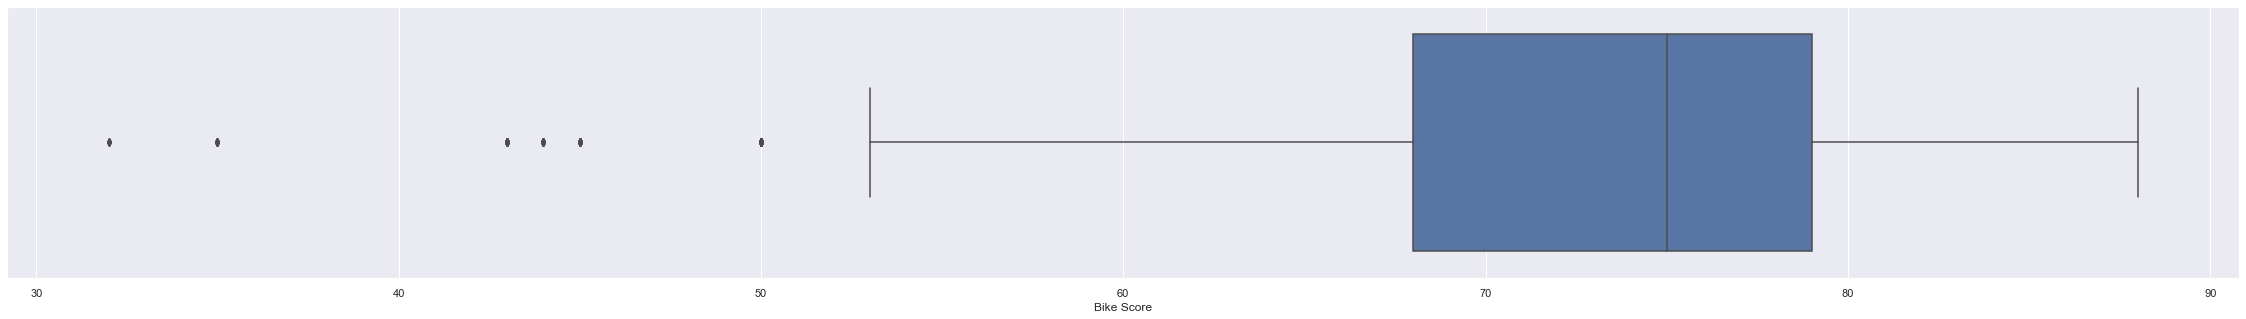

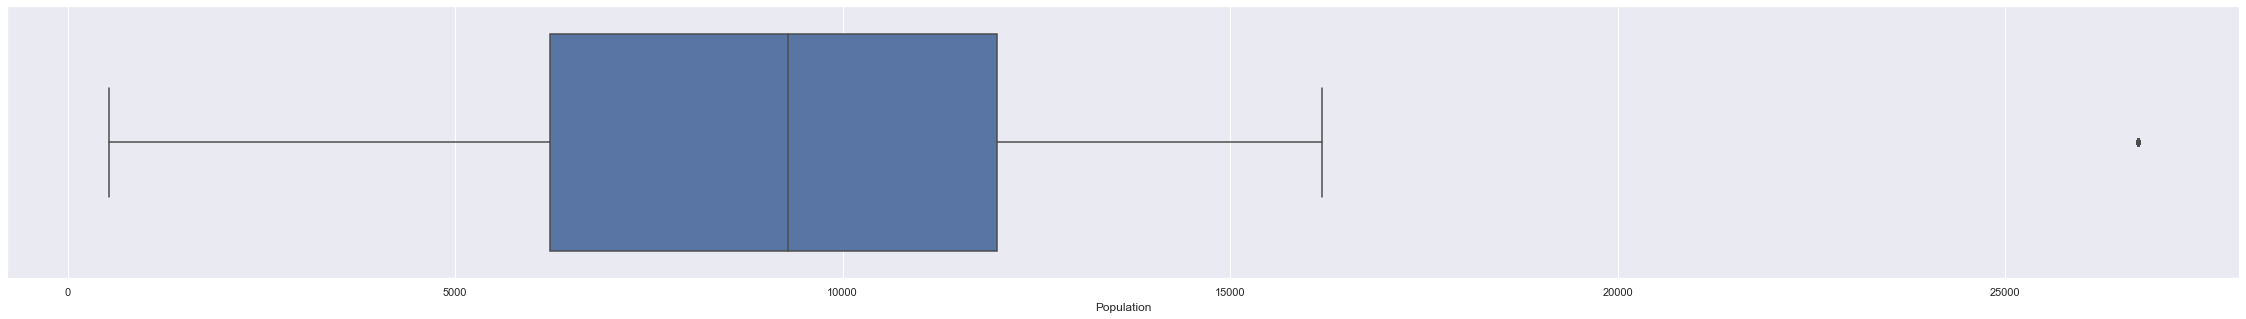

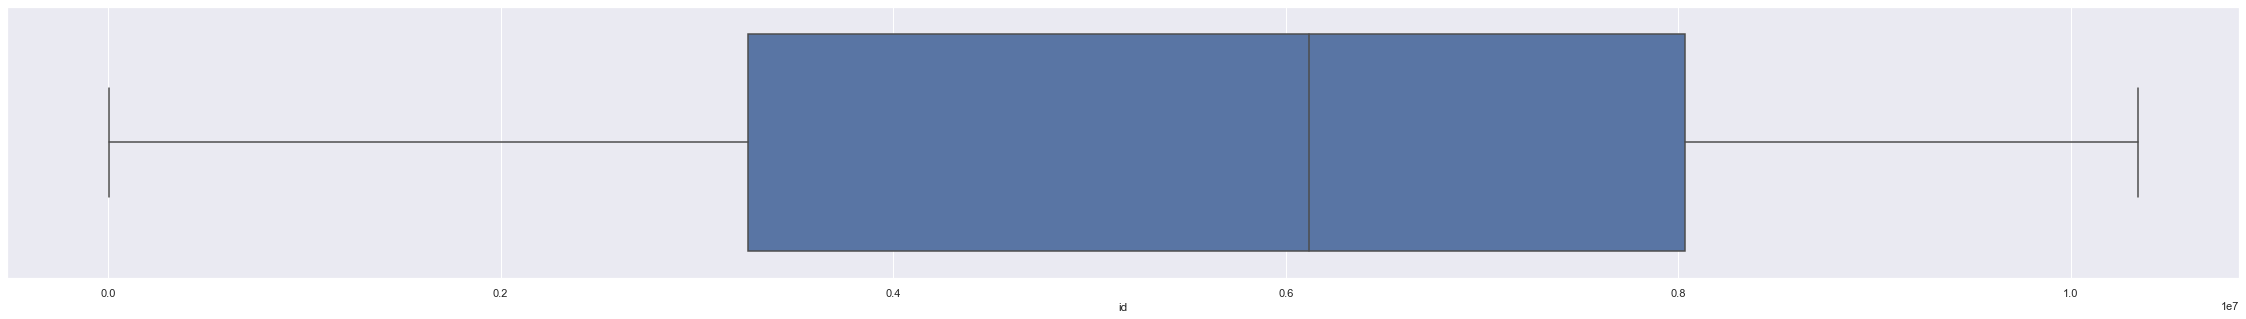

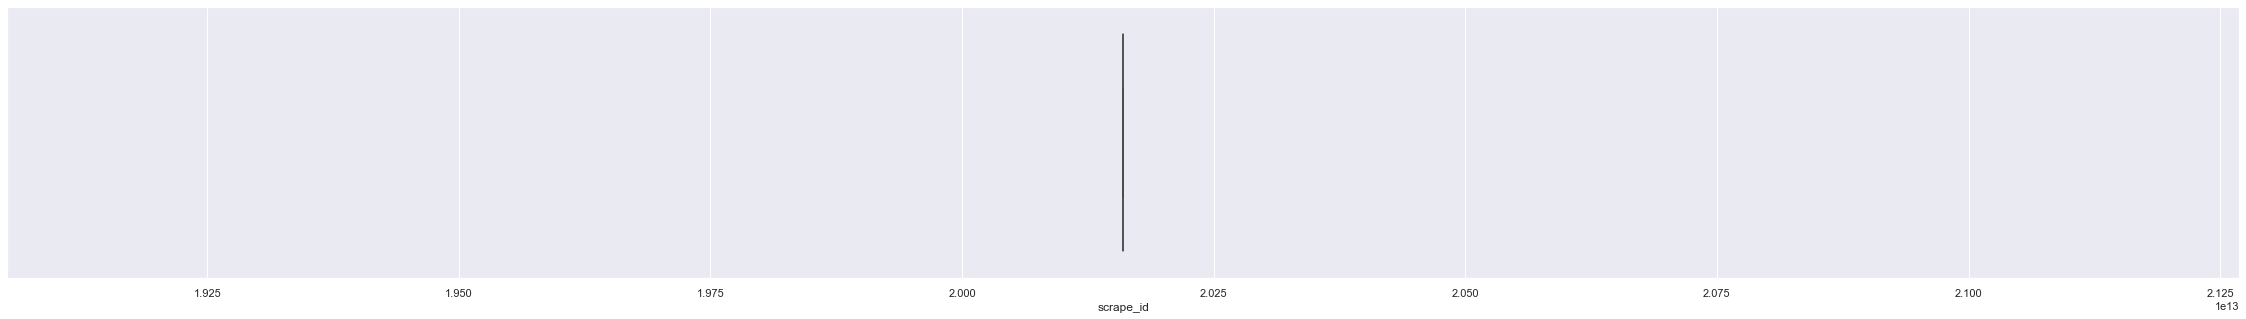

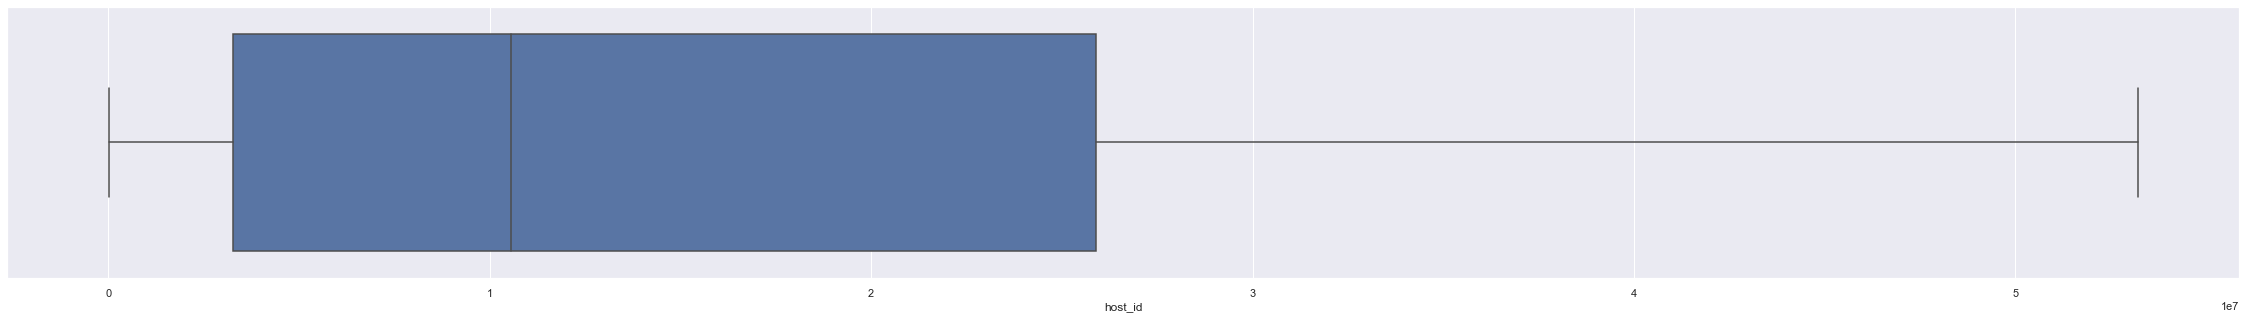

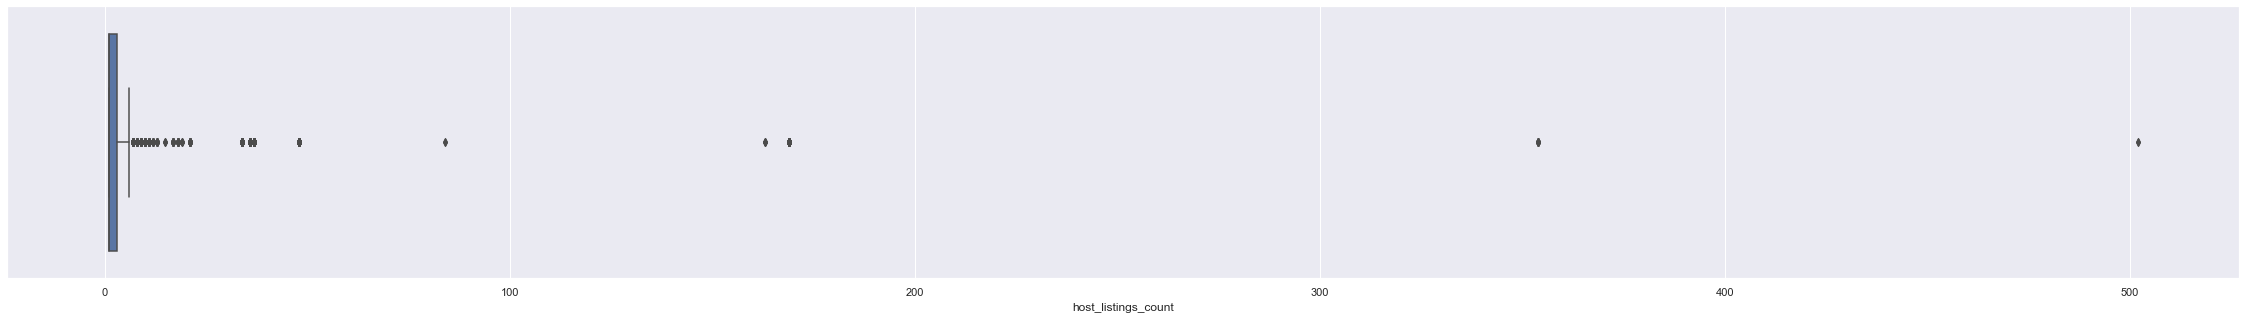

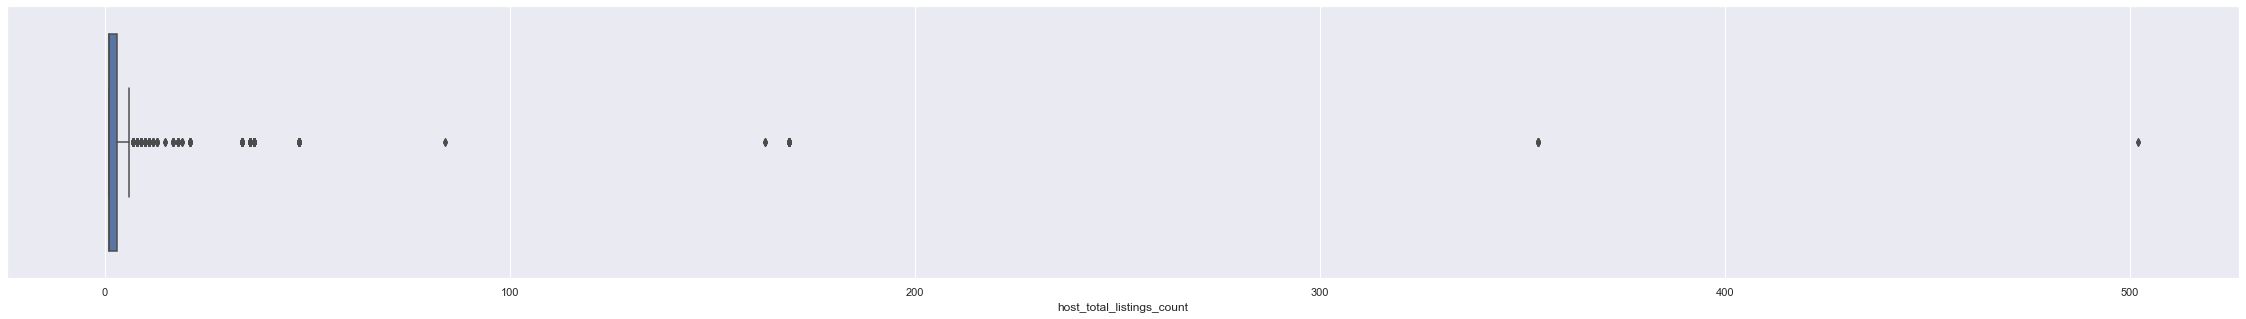

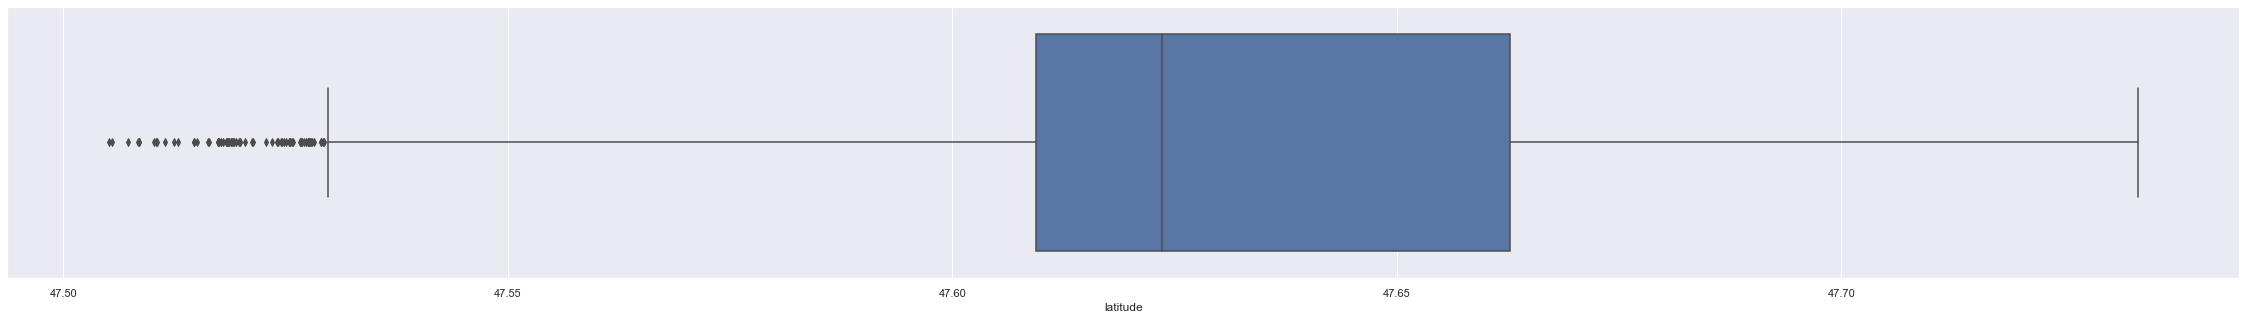

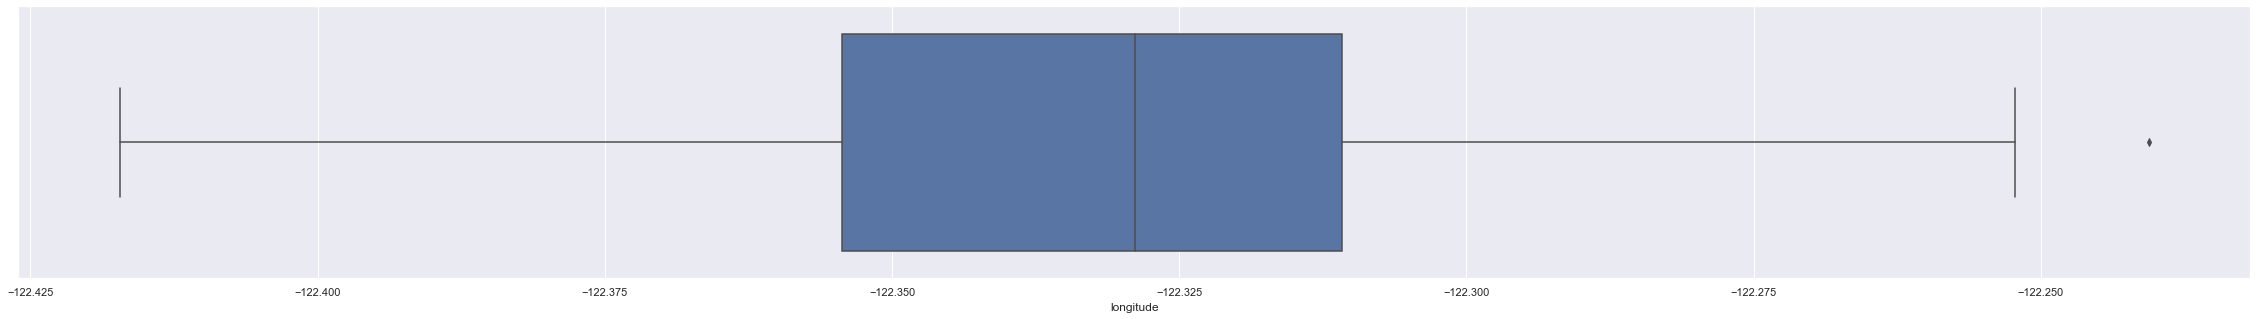

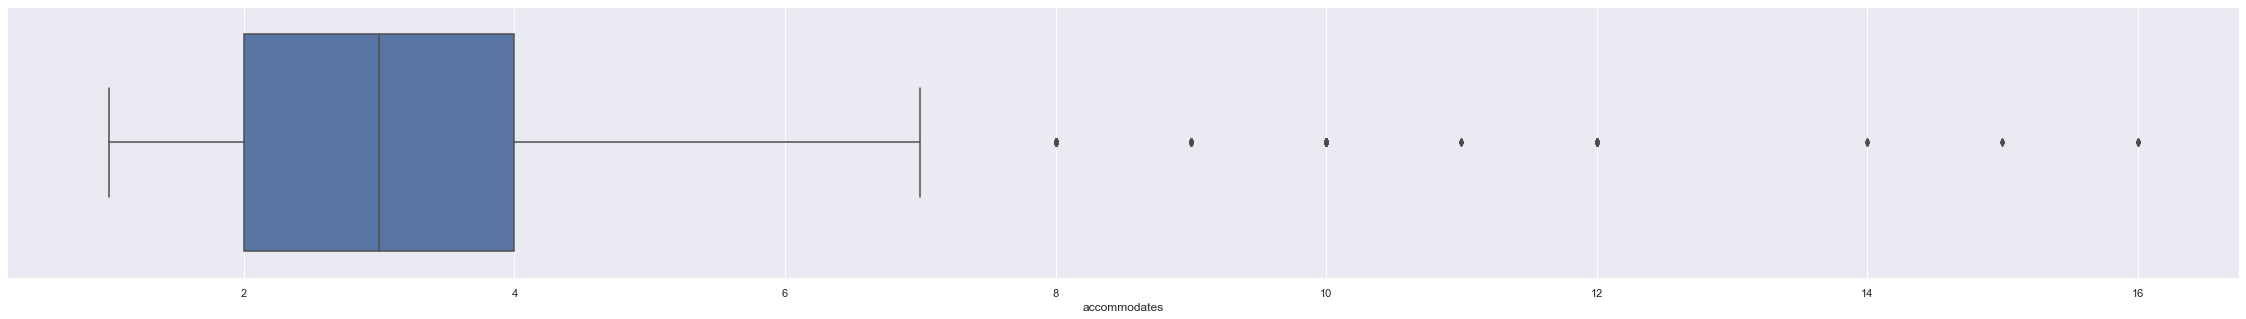

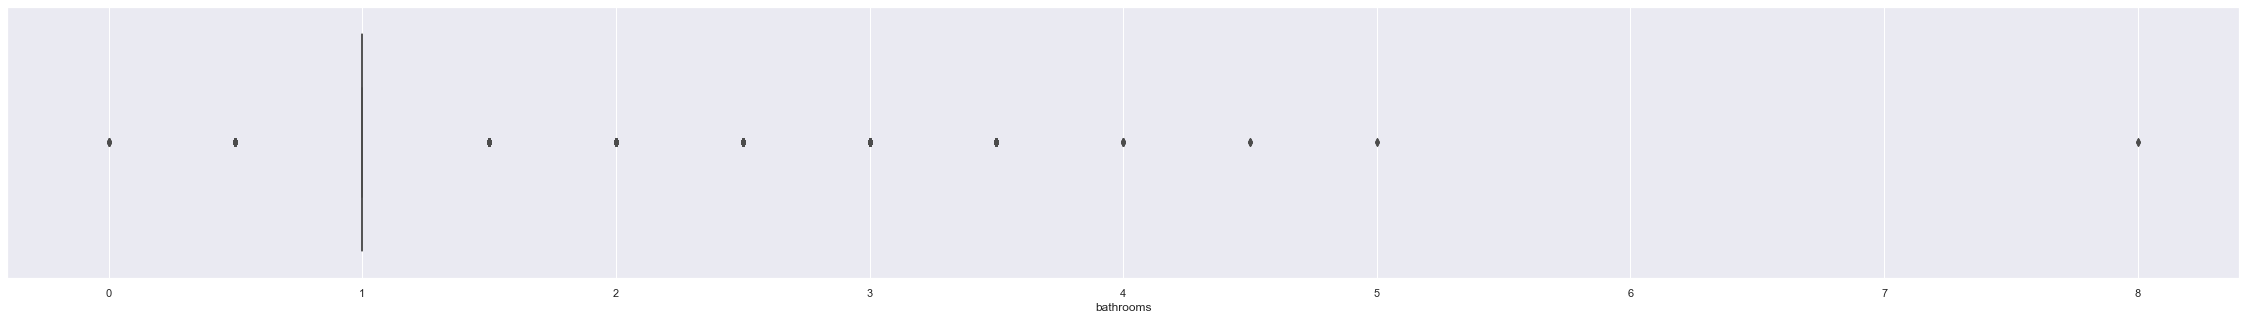

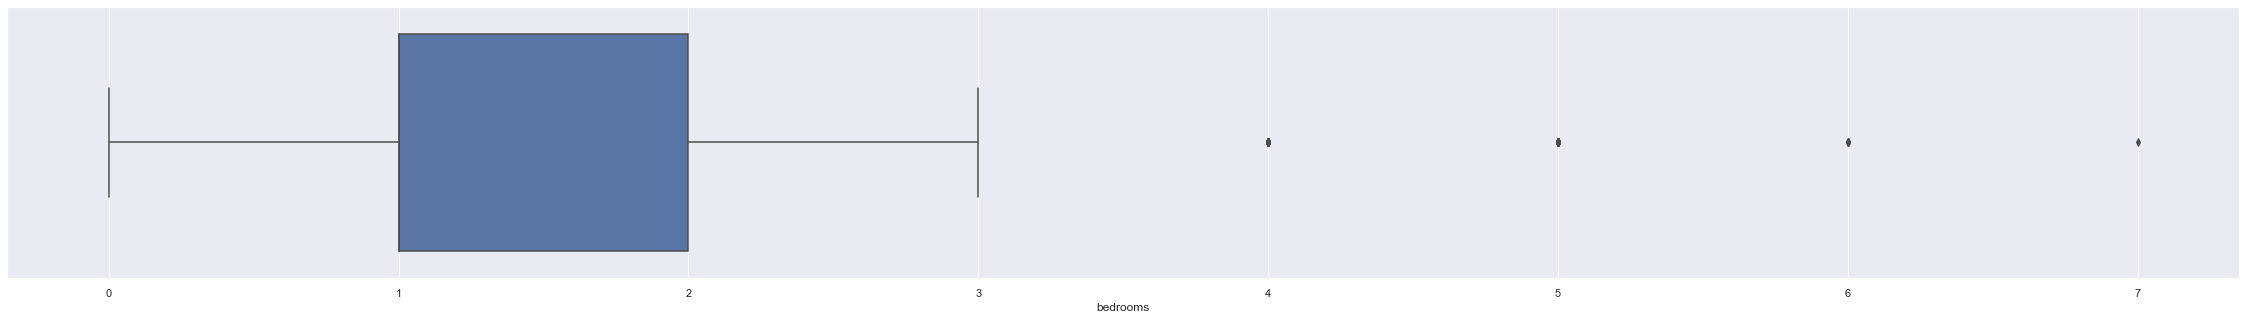

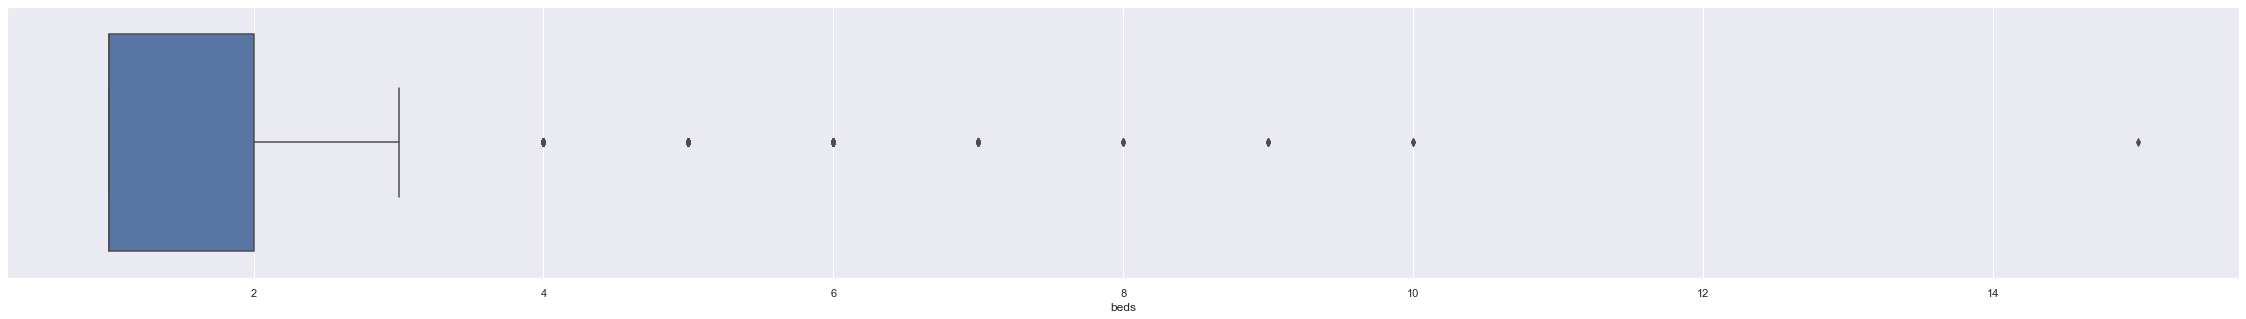

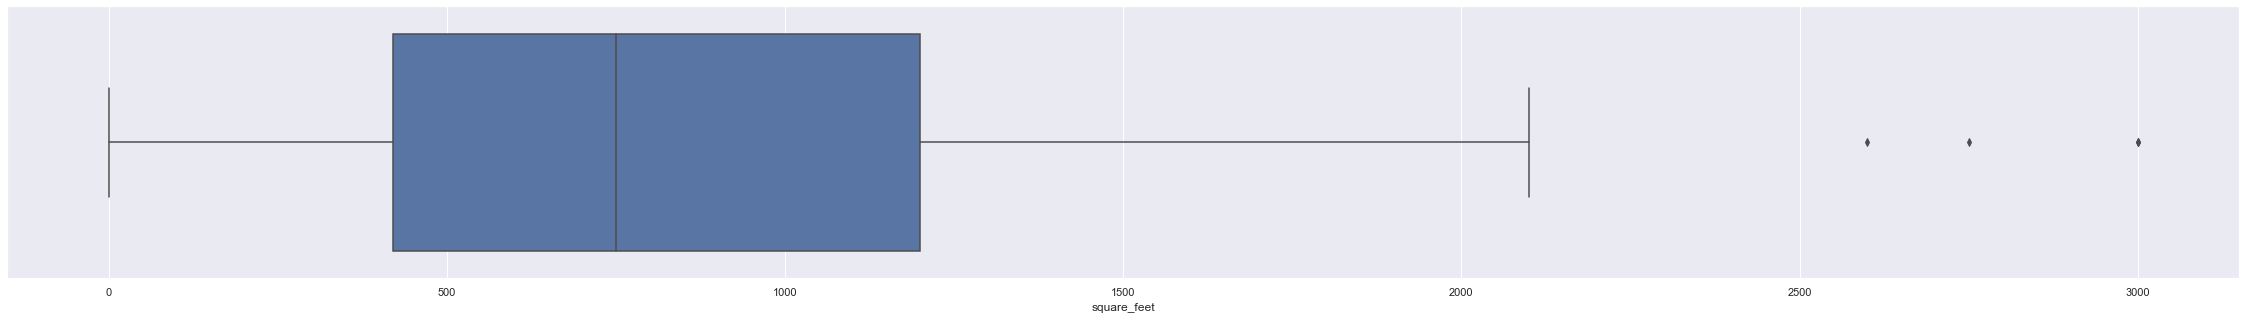

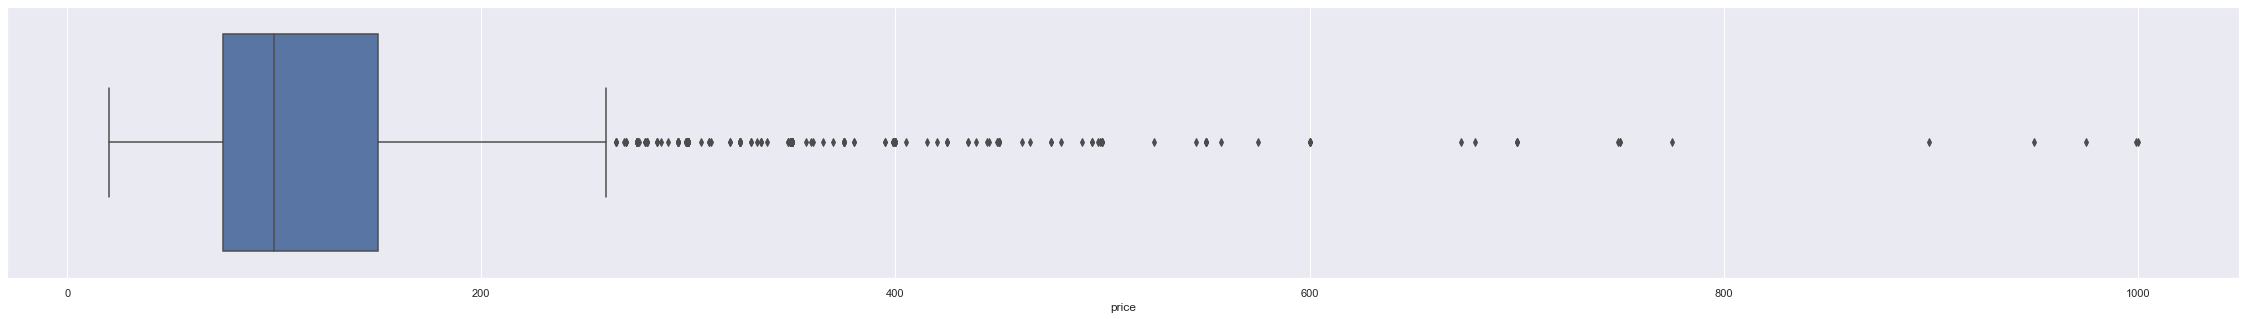

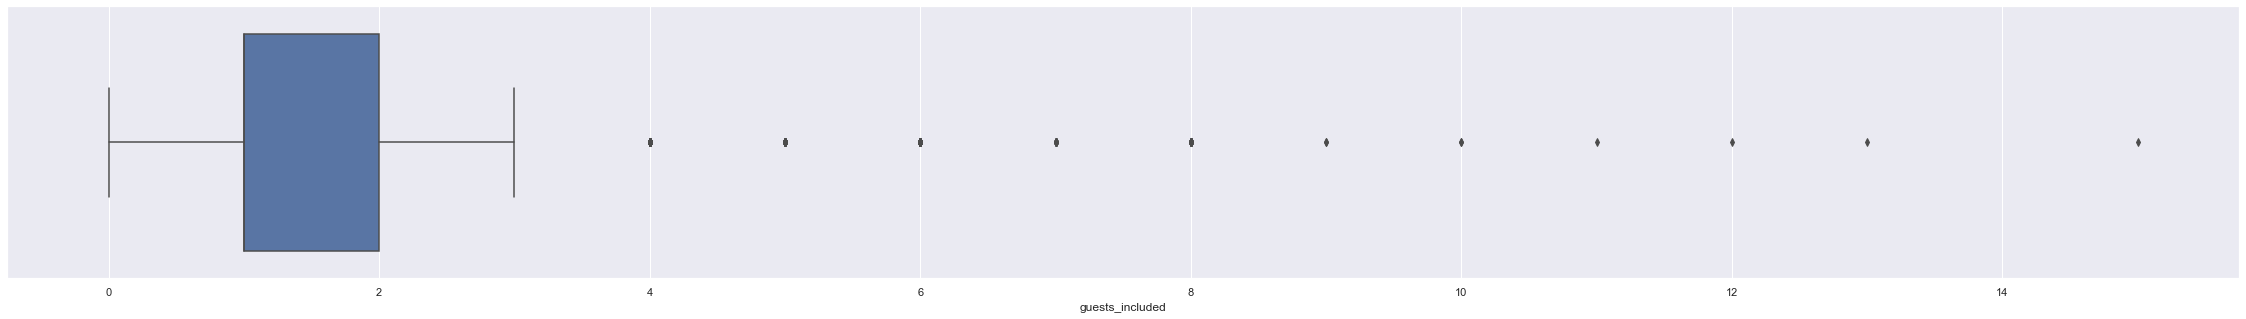

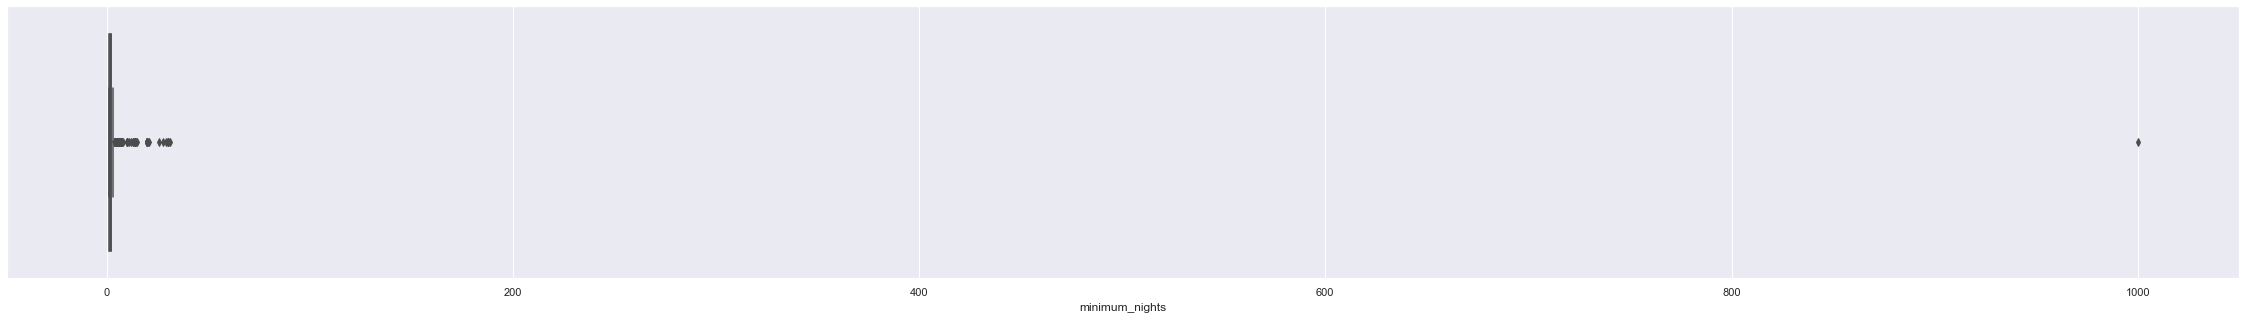

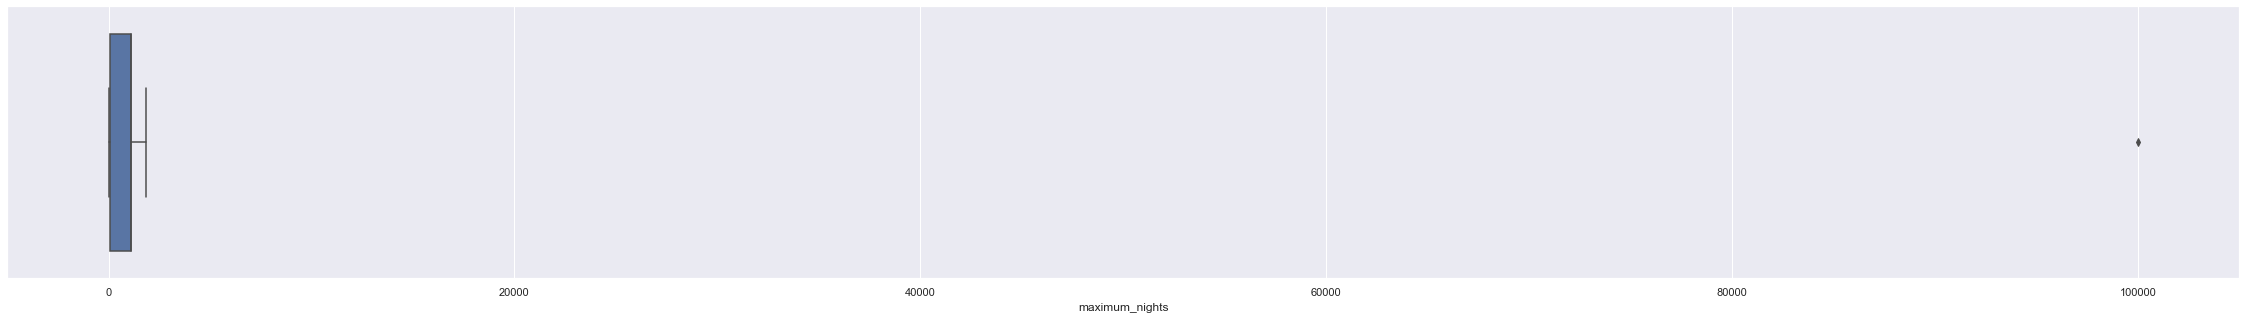

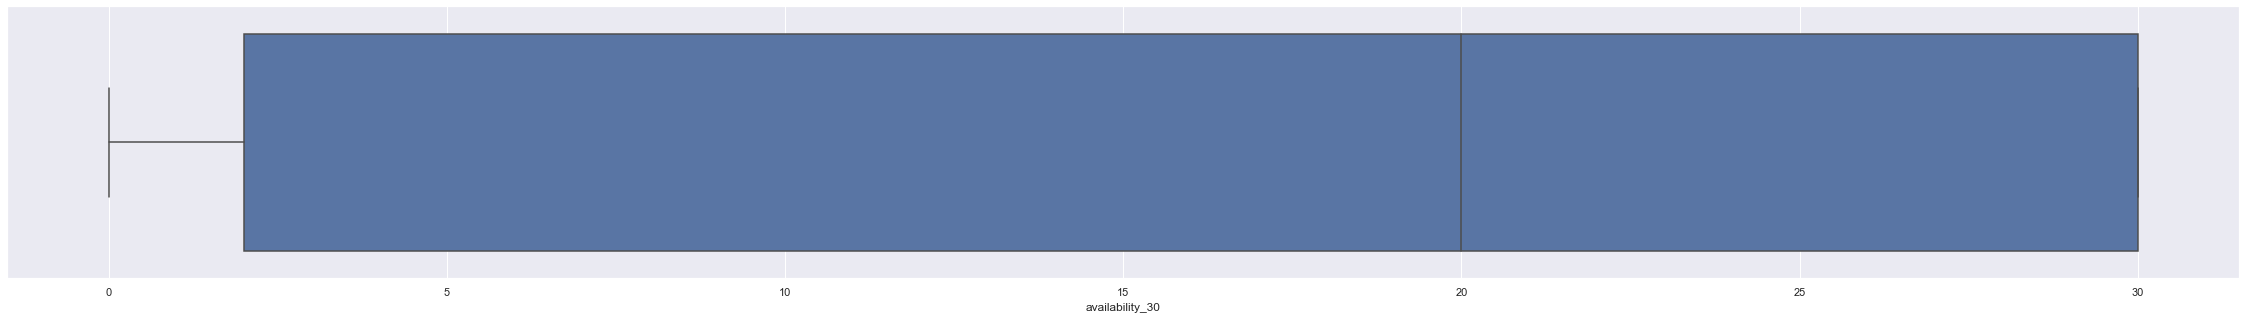

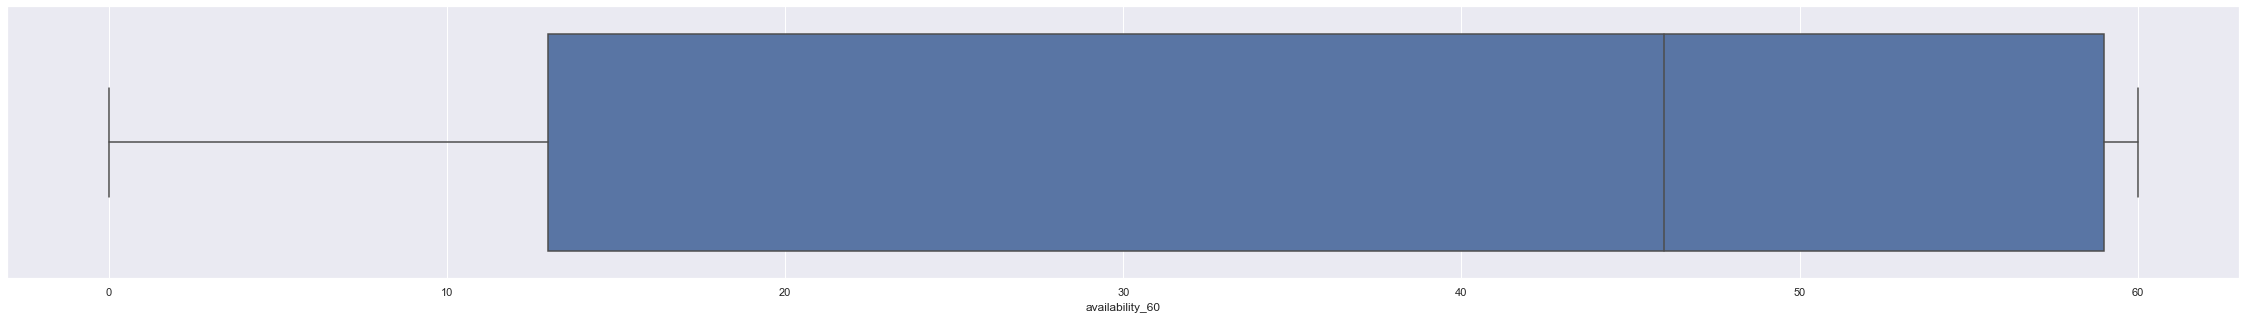

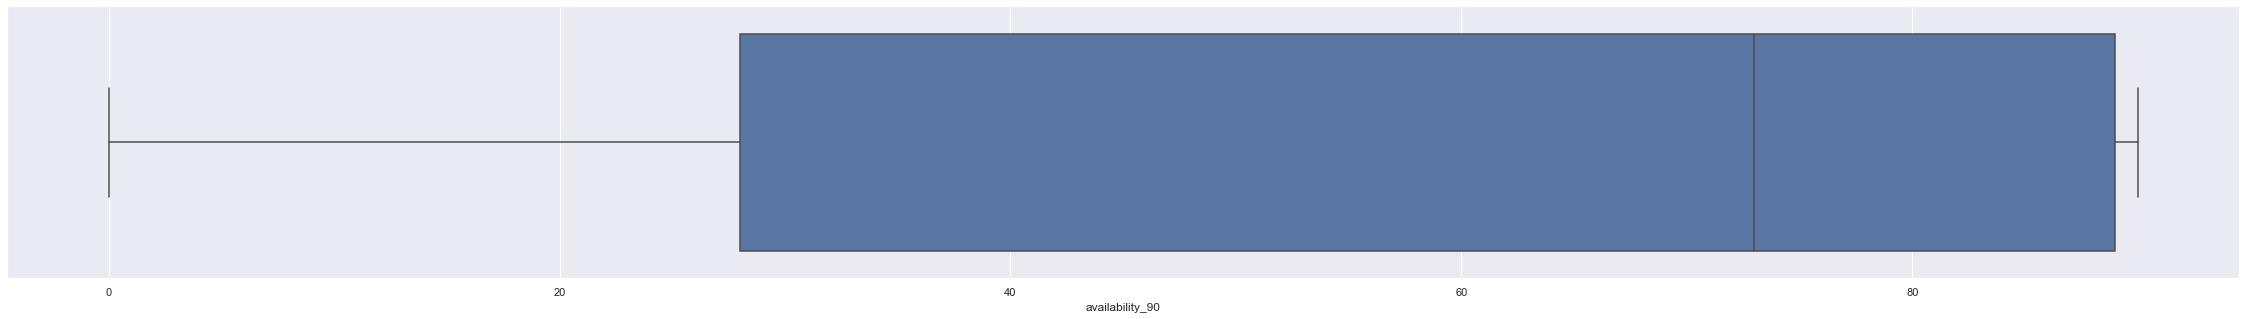

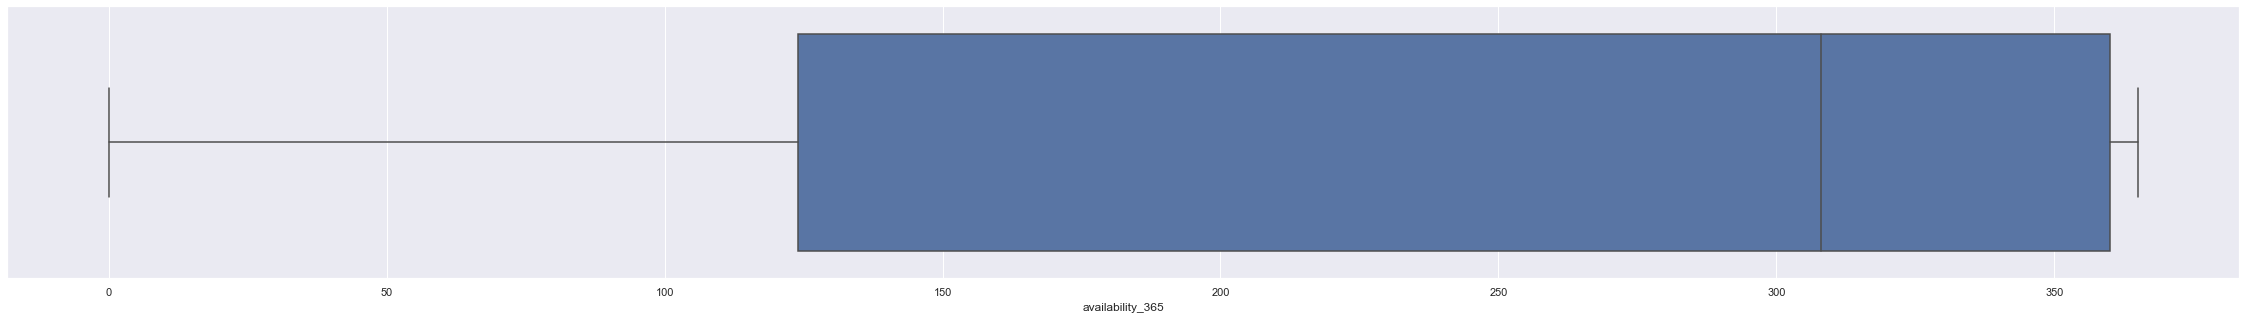

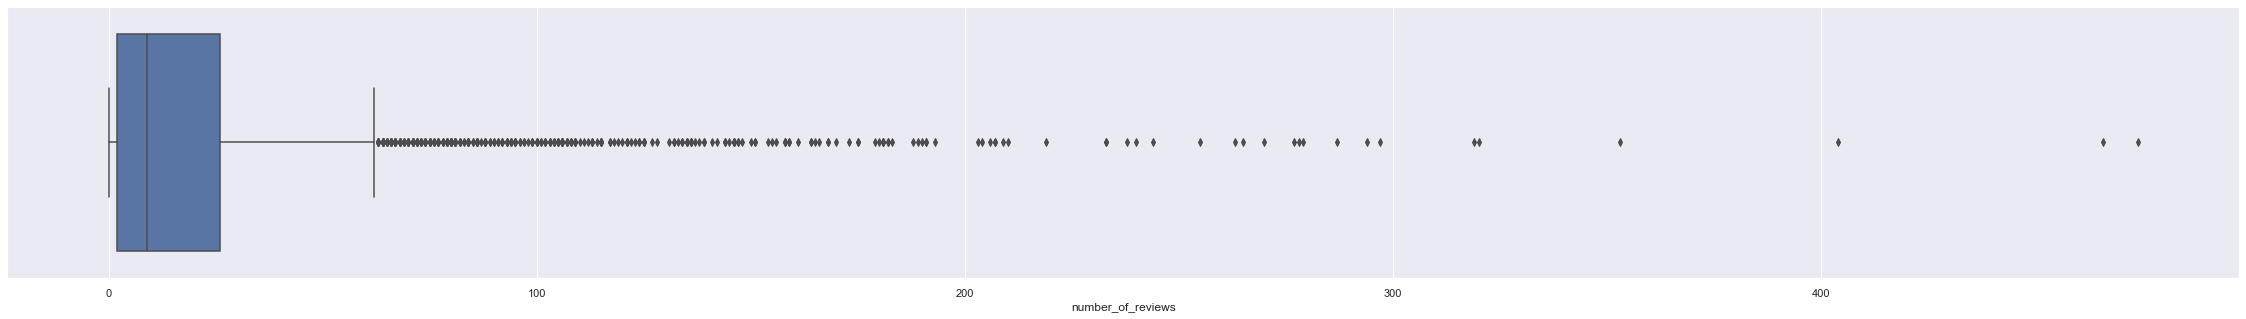

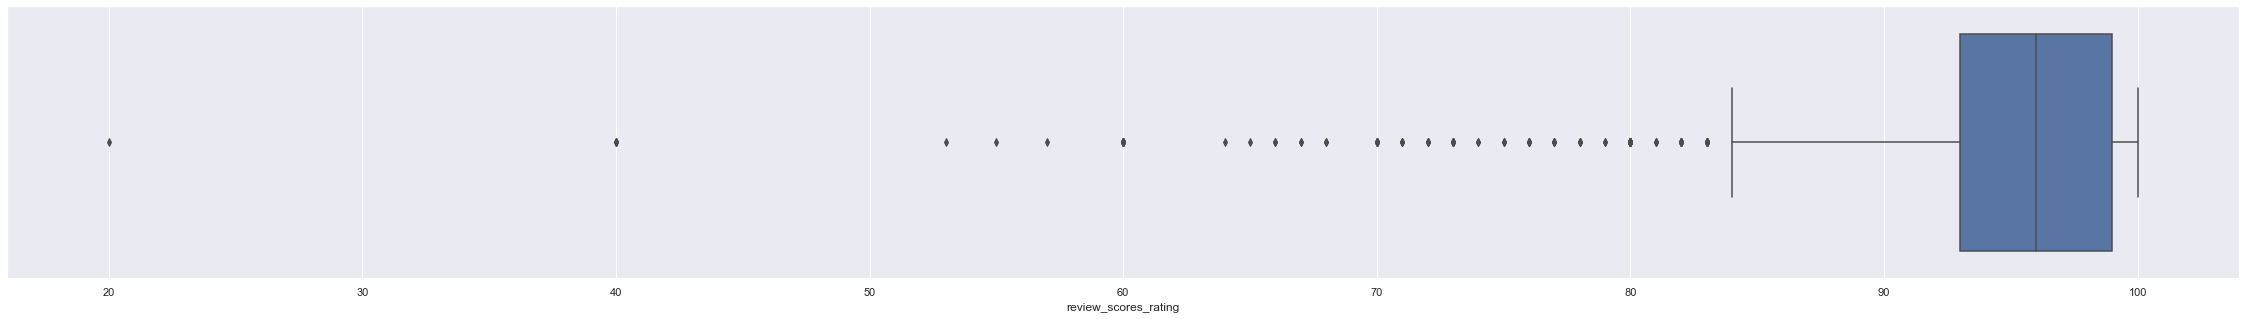

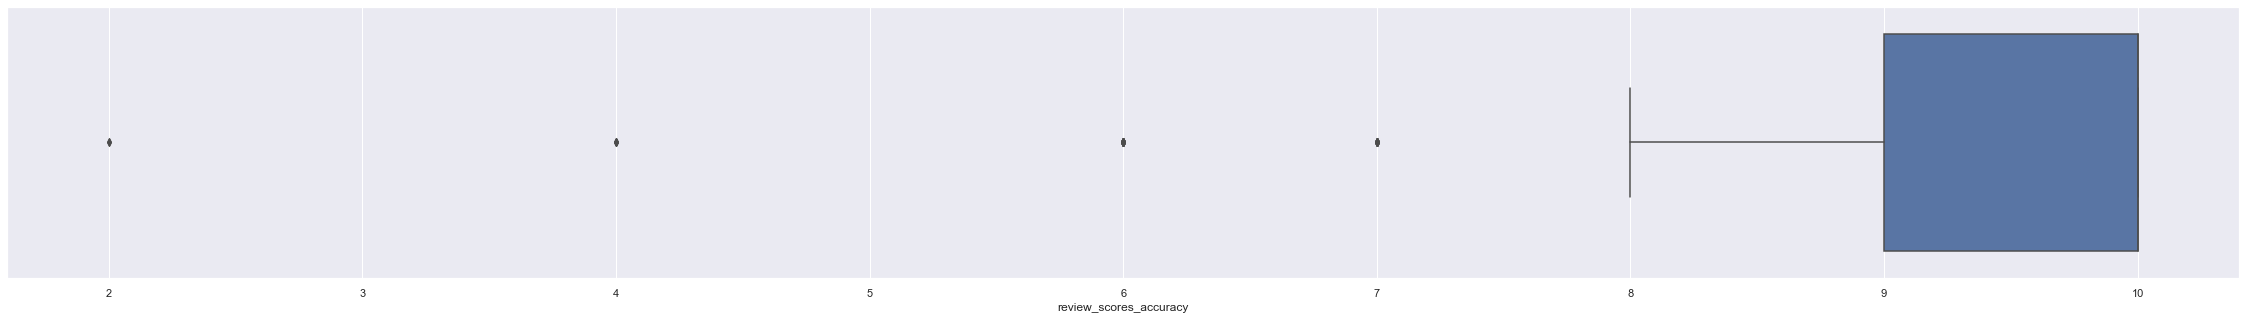

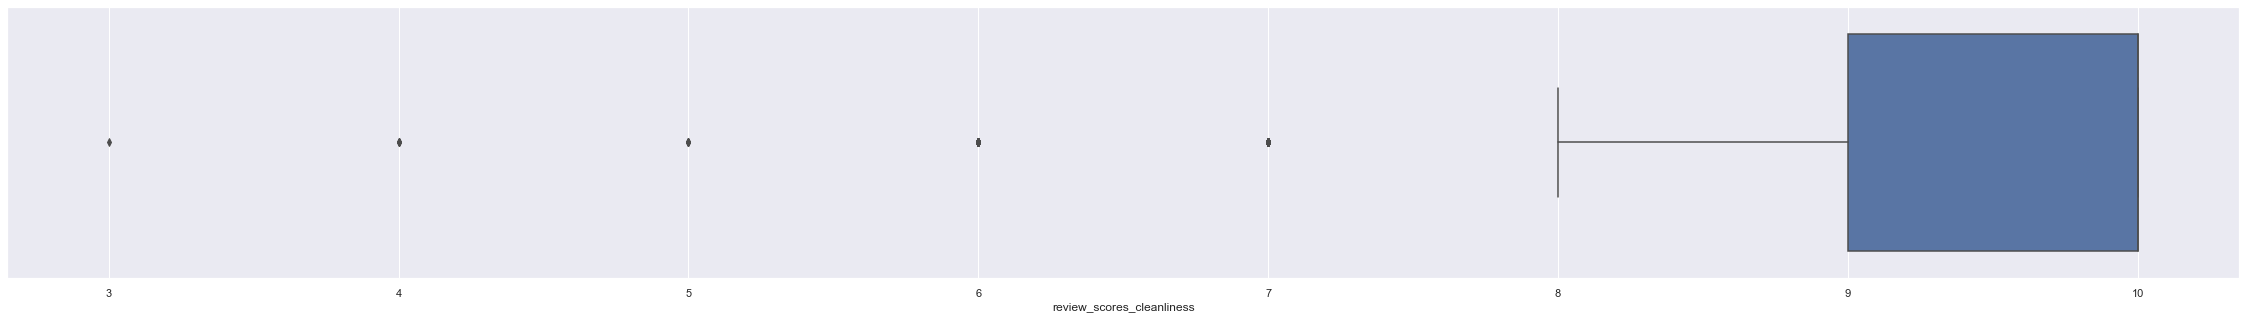

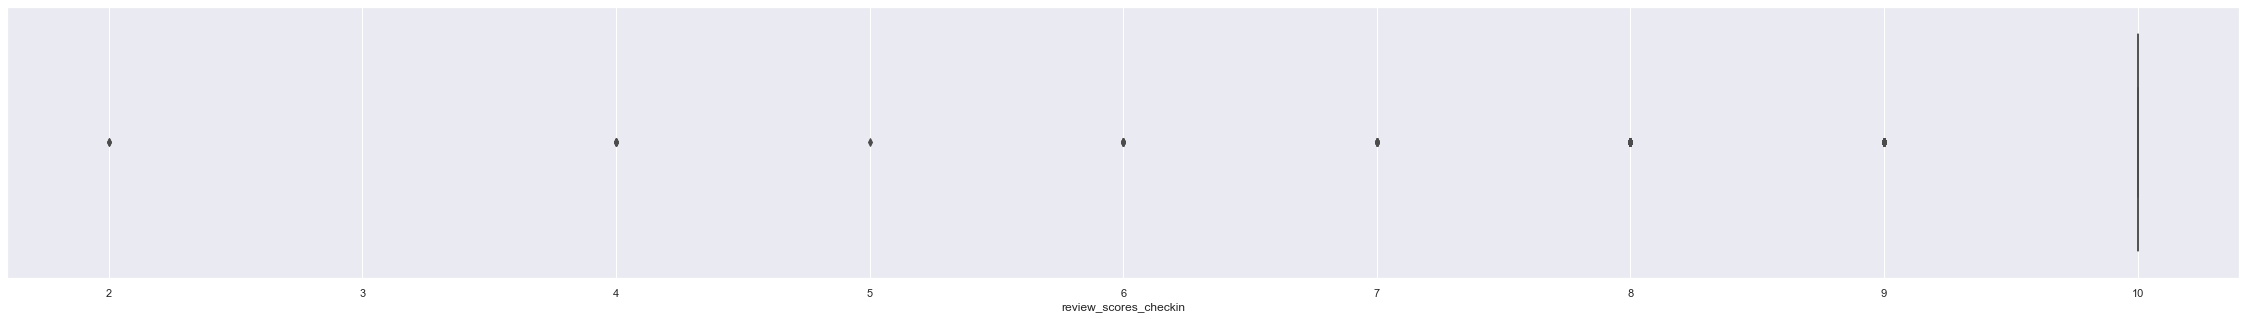

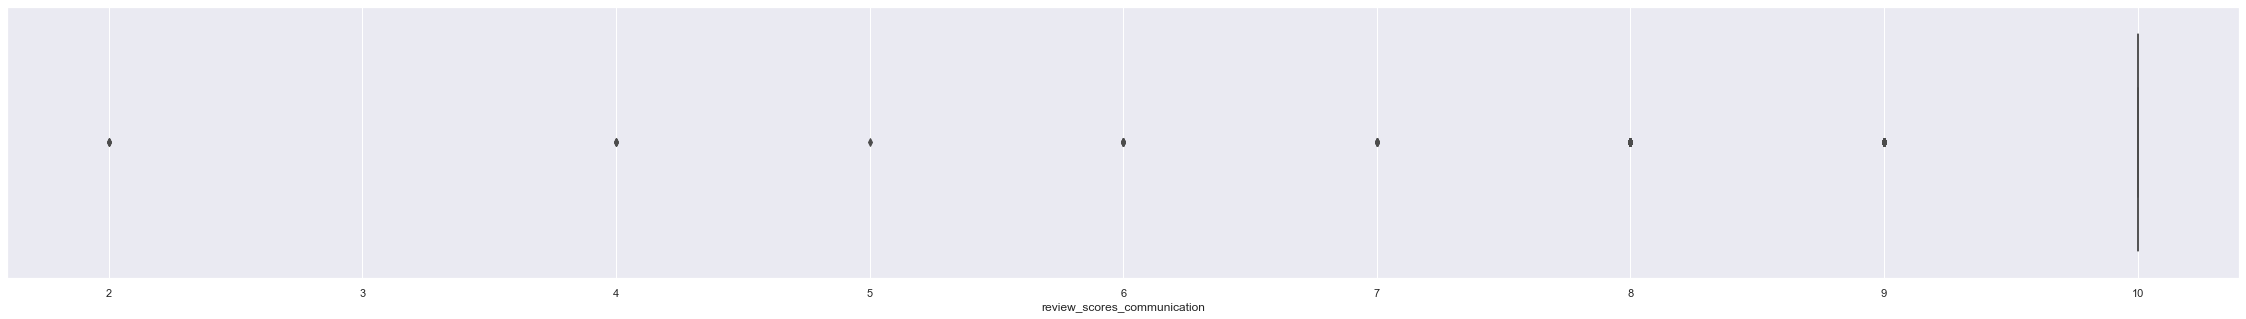

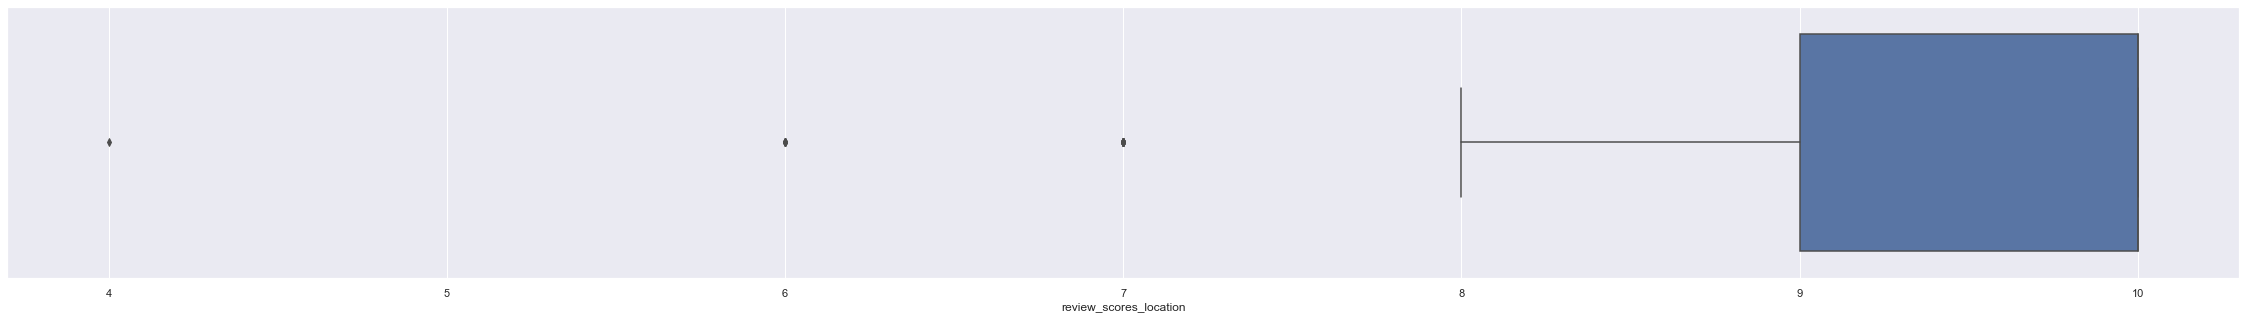

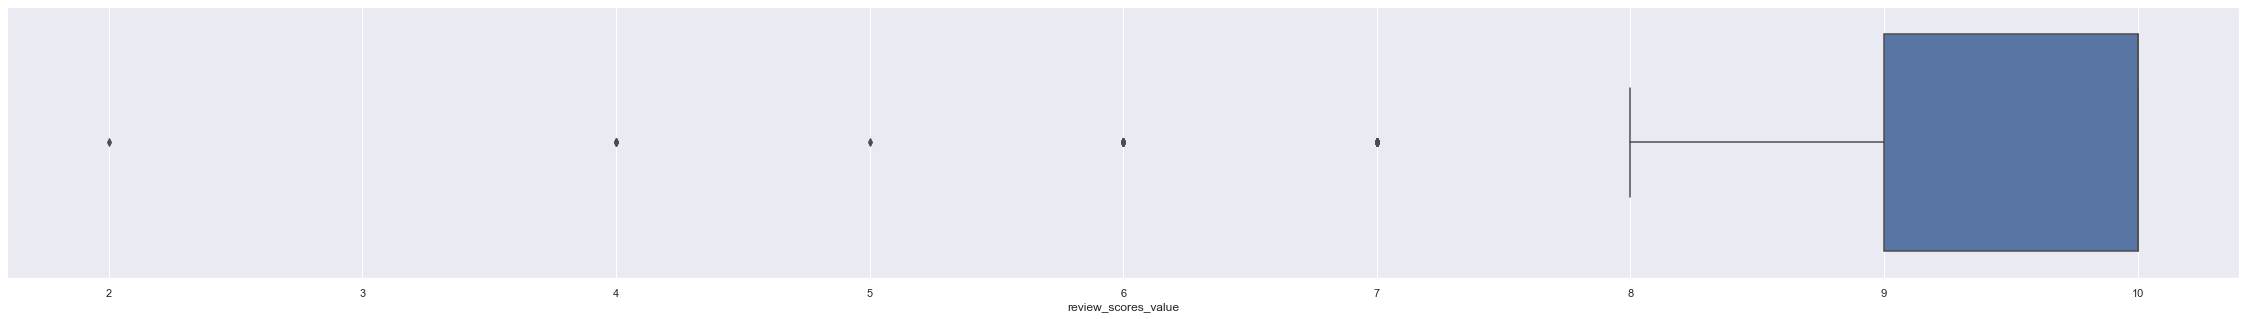

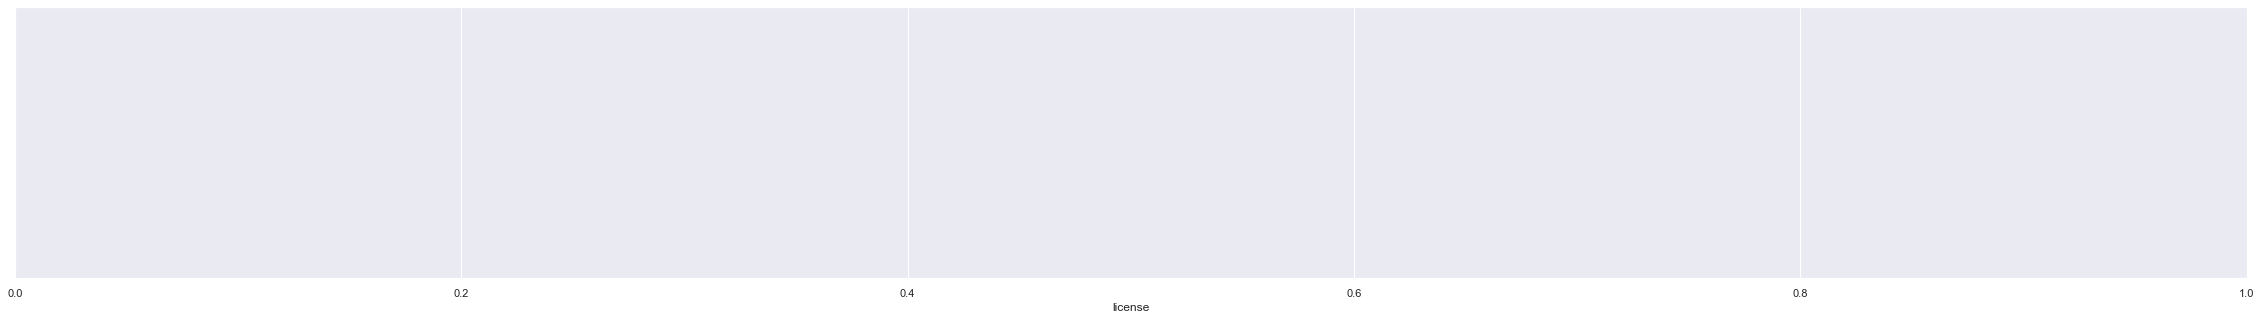

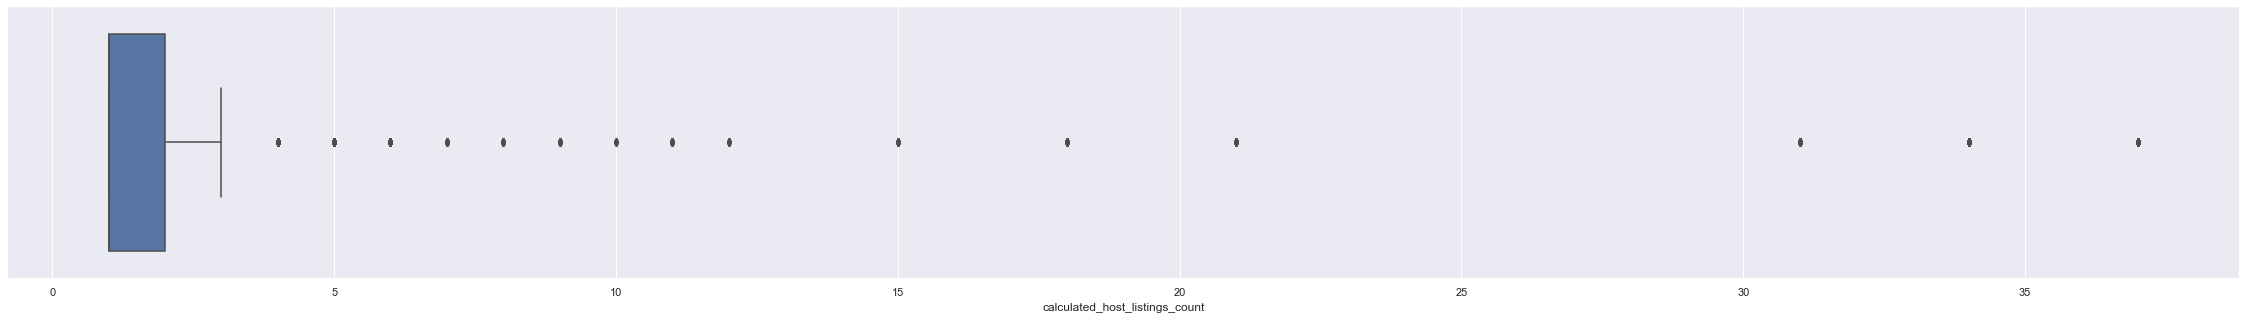

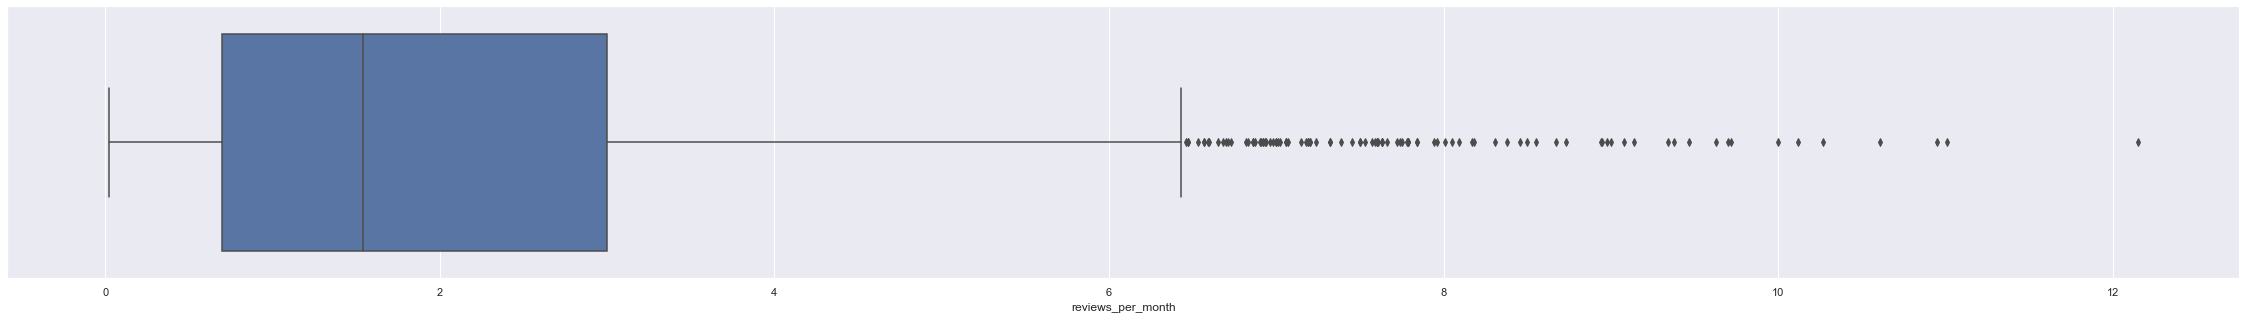

In [27]:
for var in numerical_data:
    f, axes = plt.subplots(1, 1, figsize=(40, 5))
    sb.boxplot(numerical_data[var], orient = "h")

# Correlation between Numerical Variables and Price

In [28]:
# Calculate the complete  correlation matrix
numerical_data.corr()

,Rank#,Walk Score,Transit Score,Bike Score,Population,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
Rank#,1.000000,-0.988646,-0.733547,-0.672265,-0.482521,-0.024335,NaN,0.043388,-0.150632,-0.150632,...,0.068981,0.072510,0.071189,0.106806,0.080113,-0.141040,0.127403,NaN,-0.152214,-0.025354
Walk Score,-0.988646,1.000000,0.772510,0.660217,0.464394,0.029291,NaN,-0.039877,0.161431,0.161431,...,-0.074099,-0.077760,-0.072259,-0.113030,-0.084360,0.144094,-0.135488,NaN,0.153897,0.032384
Transit Score,-0.733547,0.772510,1.000000,0.410734,0.333505,0.033406,NaN,-0.029982,0.203157,0.203157,...,-0.087018,-0.090292,-0.072838,-0.133182,-0.085187,0.070993,-0.167383,NaN,0.154623,0.054647
Bike Score,-0.672265,0.660217,0.410734,1.000000,0.452287,-0.006900,NaN,-0.052633,0.086286,0.086286,...,-0.090467,-0.077904,-0.106855,-0.102523,-0.099858,0.079460,-0.118957,NaN,0.172321,-0.016125
Population,-0.482521,0.464394,0.333505,0.452287,1.000000,0.003432,NaN,-0.078820,0.136333,0.136333,...,-0.172691,-0.137640,-0.129034,-0.152773,-0.140228,0.041217,-0.176684,NaN,0.351598,-0.060647
id,-0.024335,0.029291,0.033406,-0.006900,0.003432,1.000000,NaN,0.546514,-0.023312,-0.023312,...,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.051348,0.091716
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.043388,-0.039877,-0.029982,-0.052633,-0.078820,0.546514,NaN,1.000000,-0.069613,-0.069613,...,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.176040,0.106389
host_listings_count,-0.150632,0.161431,0.203157,0.086286,0.136333,-0.023312,NaN,-0.069613,1.000000,1.000000,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
host_total_listings_count,-0.150632,0.161431,0.203157,0.086286,0.136333,-0.023312,NaN,-0.069613,1.000000,1.000000,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272


In [29]:
corr_df = numerical_data.corr()

# Correlation Matrix for the first 11 rows
pd.DataFrame(corr_df.loc[:, :"maximum_nights"])

,Rank#,Walk Score,Transit Score,Bike Score,Population,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights
Rank#,1.000000,-0.988646,-0.733547,-0.672265,-0.482521,-0.024335,NaN,0.043388,-0.150632,-0.150632,...,0.000377,0.028975,0.067552,0.121736,0.042257,-0.202680,-0.066925,0.060162,-0.022607,-0.021119
Walk Score,-0.988646,1.000000,0.772510,0.660217,0.464394,0.029291,NaN,-0.039877,0.161431,0.161431,...,-0.013334,-0.032324,-0.069515,-0.134324,-0.047613,0.185133,0.073147,-0.065311,0.018549,0.024996
Transit Score,-0.733547,0.772510,1.000000,0.410734,0.333505,0.033406,NaN,-0.029982,0.203157,0.203157,...,0.121024,-0.036140,-0.076280,-0.175278,-0.067004,0.044464,0.090535,-0.085936,0.005412,0.042666
Bike Score,-0.672265,0.660217,0.410734,1.000000,0.452287,-0.006900,NaN,-0.052633,0.086286,0.086286,...,0.144170,-0.042376,-0.045064,-0.063491,-0.034453,0.079555,0.017531,-0.029594,0.039366,-0.003302
Population,-0.482521,0.464394,0.333505,0.452287,1.000000,0.003432,NaN,-0.078820,0.136333,0.136333,...,-0.021080,-0.017333,-0.068337,-0.068257,-0.001104,0.235383,-0.041157,-0.039036,0.013258,0.024969
id,-0.024335,0.029291,0.033406,-0.006900,0.003432,1.000000,NaN,0.546514,-0.023312,-0.023312,...,0.013360,-0.074279,-0.061821,-0.064113,-0.050568,-0.170288,-0.046289,-0.103058,-0.021601,0.101529
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.043388,-0.039877,-0.029982,-0.052633,-0.078820,0.546514,NaN,1.000000,-0.069613,-0.069613,...,0.014749,-0.099620,-0.057076,-0.075722,-0.065197,-0.184730,-0.051332,-0.083187,-0.024572,0.057532
host_listings_count,-0.150632,0.161431,0.203157,0.086286,0.136333,-0.023312,NaN,-0.069613,1.000000,1.000000,...,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,0.093962,-0.059289,0.001894,0.022684
host_total_listings_count,-0.150632,0.161431,0.203157,0.086286,0.136333,-0.023312,NaN,-0.069613,1.000000,1.000000,...,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,0.093962,-0.059289,0.001894,0.022684


In [30]:
pd.DataFrame(corr_df.loc[:,"availability_30":])

,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
Rank#,0.062293,0.072379,0.080745,0.091474,-0.016355,0.068981,0.072510,0.071189,0.106806,0.080113,-0.141040,0.127403,NaN,-0.152214,-0.025354
Walk Score,-0.062254,-0.072414,-0.080577,-0.091142,0.017439,-0.074099,-0.077760,-0.072259,-0.113030,-0.084360,0.144094,-0.135488,NaN,0.153897,0.032384
Transit Score,-0.015364,-0.019046,-0.025344,-0.079732,0.018880,-0.087018,-0.090292,-0.072838,-0.133182,-0.085187,0.070993,-0.167383,NaN,0.154623,0.054647
Bike Score,-0.050921,-0.064031,-0.069032,-0.035218,0.012590,-0.090467,-0.077904,-0.106855,-0.102523,-0.099858,0.079460,-0.118957,NaN,0.172321,-0.016125
Population,0.029875,0.026227,0.021590,0.016649,-0.042320,-0.172691,-0.137640,-0.129034,-0.152773,-0.140228,0.041217,-0.176684,NaN,0.351598,-0.060647
id,-0.068067,-0.075651,-0.086914,-0.159447,-0.506105,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.051348,0.091716
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,-0.029677,-0.037683,-0.042542,-0.083078,-0.261822,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.176040,0.106389
host_listings_count,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
host_total_listings_count,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272


Find correlation of price across multiple columns

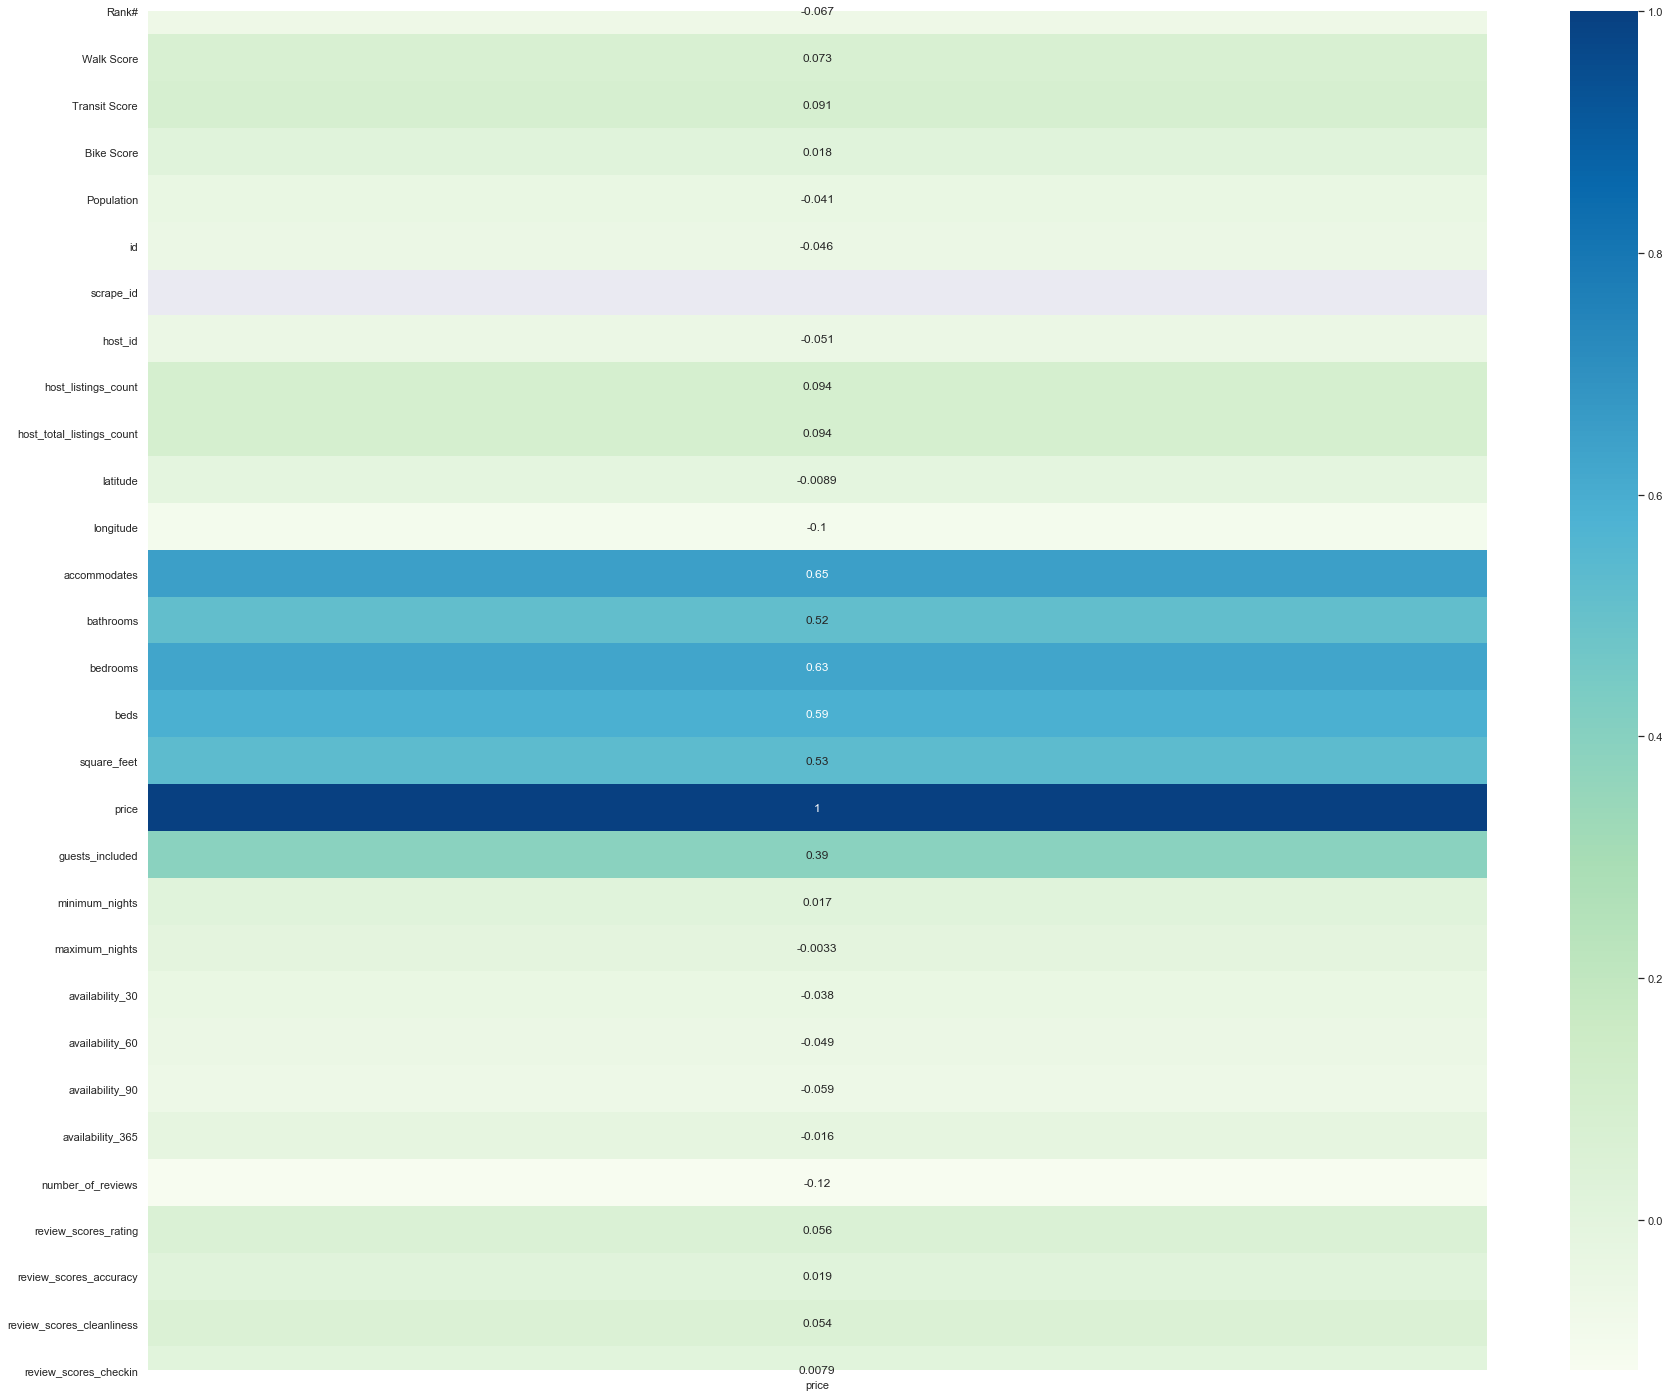

In [31]:
df_corr_impact_action_yn = numerical_data[numerical_data.columns[0:31]].corr()['price'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(30,25))
#plot matrix
sb.heatmap(df_corr_impact_action_yn.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();

Collate important correlations to better analyse

In [32]:
imptCols = ["price","accommodates","bathrooms","bedrooms","beds","guests_included","square_feet"]
imptCols_df = pd.DataFrame(listings[ ["price","accommodates","bathrooms","bedrooms","beds","guests_included","square_feet"]])
imptCorr_df = pd.DataFrame(corr_df.loc[imptCols,imptCols])
imptCorr_df


,price,accommodates,bathrooms,bedrooms,beds,guests_included,square_feet
price,1.000000,0.652218,0.516424,0.627720,0.589525,0.392875,0.531752
accommodates,0.652218,1.000000,0.538439,0.770974,0.861119,0.532796,0.439057
bathrooms,0.516424,0.538439,1.000000,0.610937,0.532838,0.304780,0.381094
bedrooms,0.627720,0.770974,0.610937,1.000000,0.753167,0.457009,0.448786
beds,0.589525,0.861119,0.532838,0.753167,1.000000,0.460512,0.312155
guests_included,0.392875,0.532796,0.304780,0.457009,0.460512,1.000000,0.471582
square_feet,0.531752,0.439057,0.381094,0.448786,0.312155,0.471582,1.000000


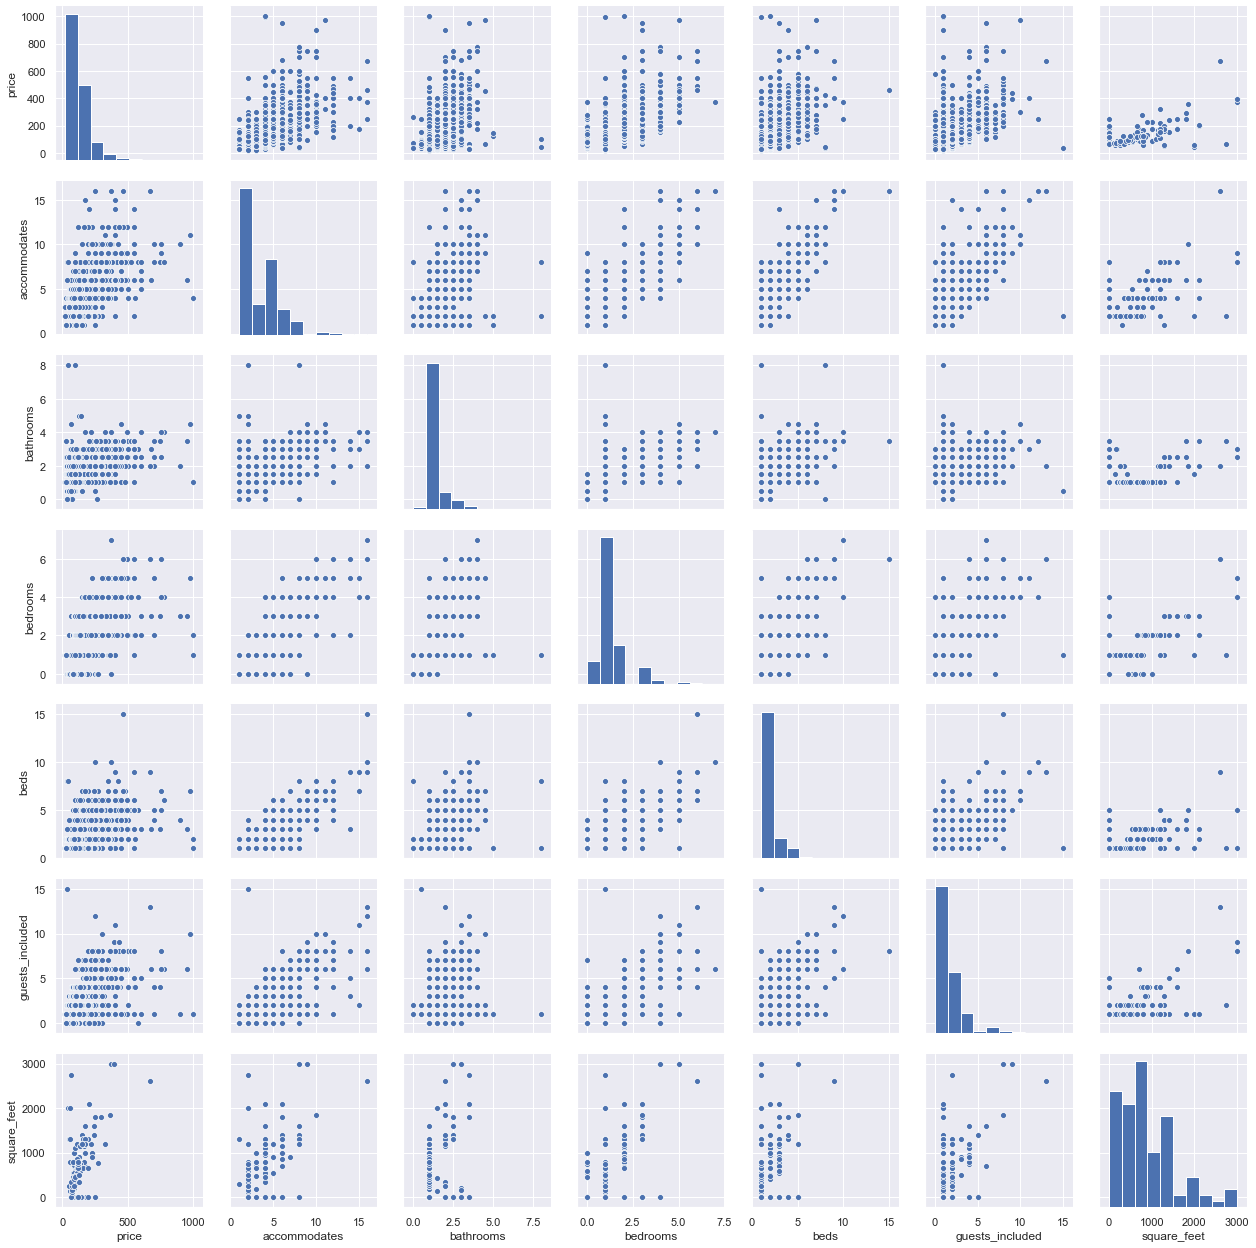

In [33]:
# Draw pairs of variables against one another
sb.pairplot(data = imptCols_df)

__Heatmap for correlation matrix__

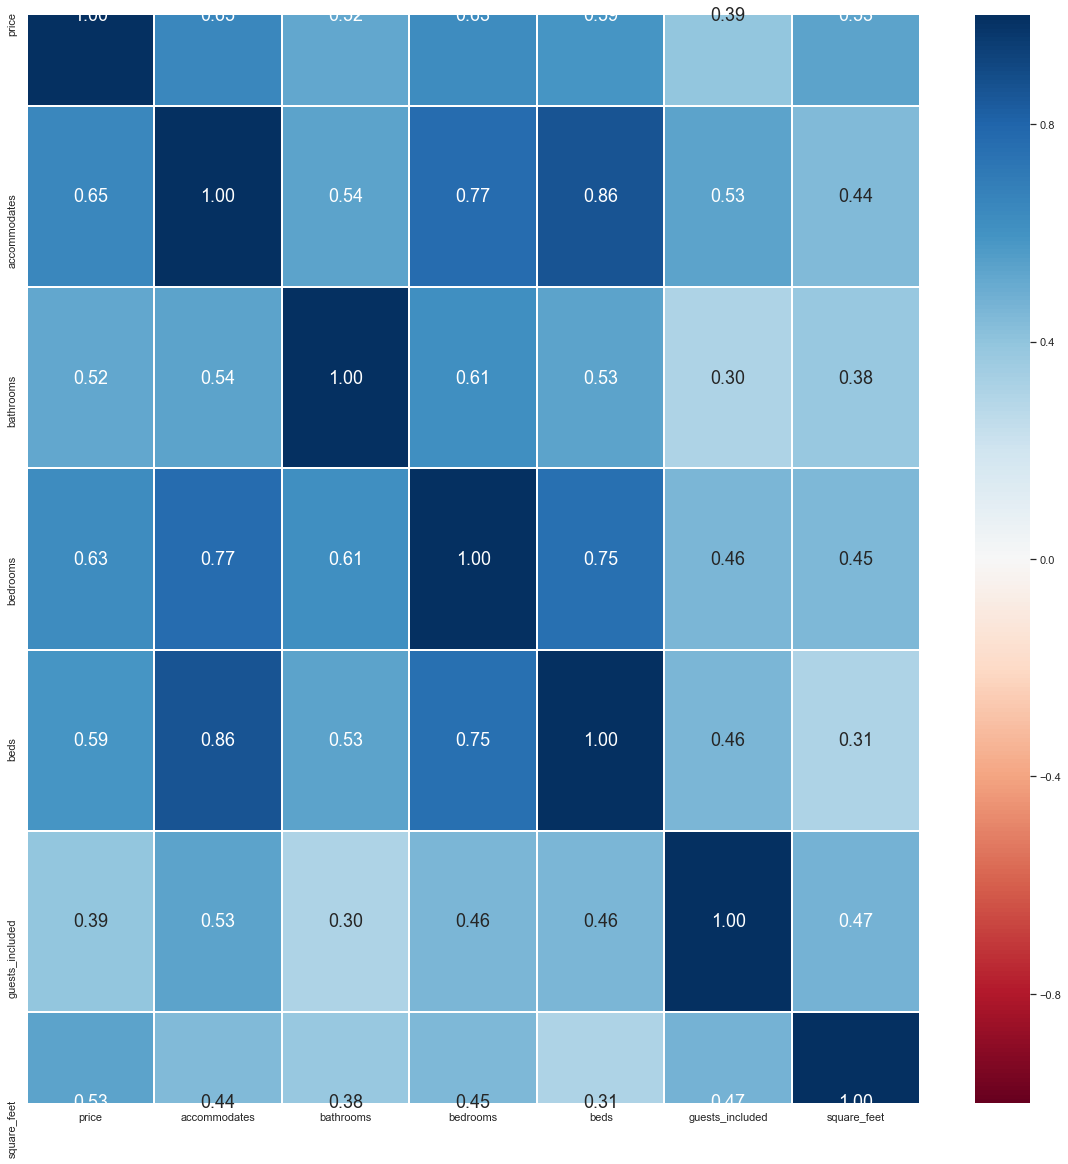

In [34]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(imptCorr_df, vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

__No. of accommodates, bathrooms, bedrooms, beds and guests included__

In [35]:
imptCols_df.describe()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,square_feet
count,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,97.000000
mean,127.976166,3.349398,1.259469,1.307712,1.735394,1.672603,854.618557
std,90.250022,1.977599,0.590369,0.883395,1.139480,1.311040,671.404893
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,75.000000,2.000000,1.000000,1.000000,1.000000,1.000000,420.000000
50%,100.000000,3.000000,1.000000,1.000000,1.000000,1.000000,750.000000
75%,150.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1200.000000
max,1000.000000,16.000000,8.000000,7.000000,15.000000,15.000000,3000.000000


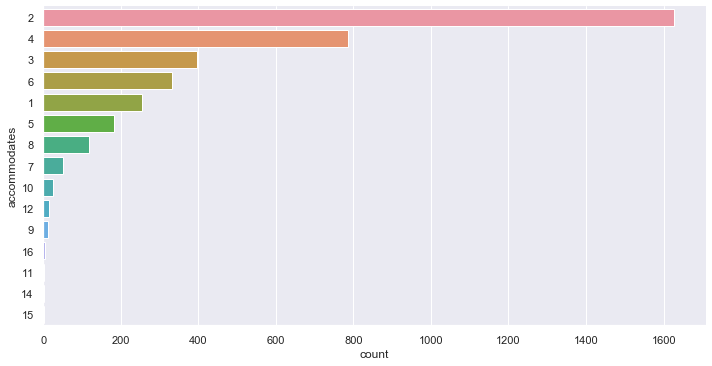

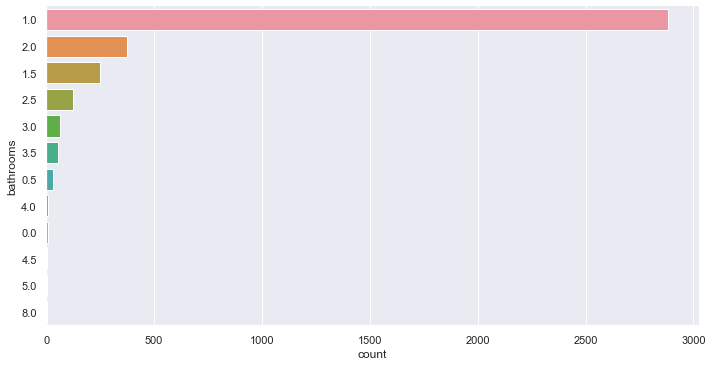

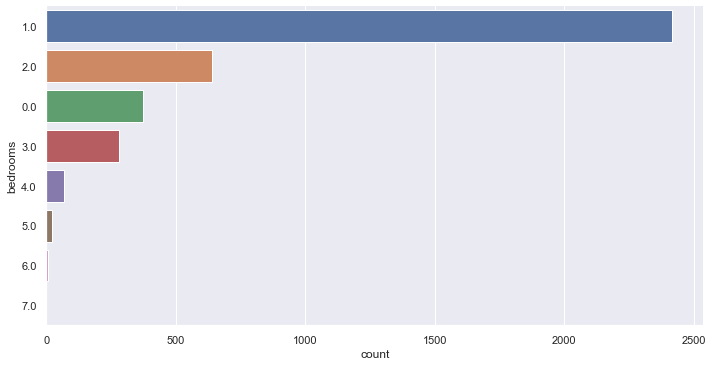

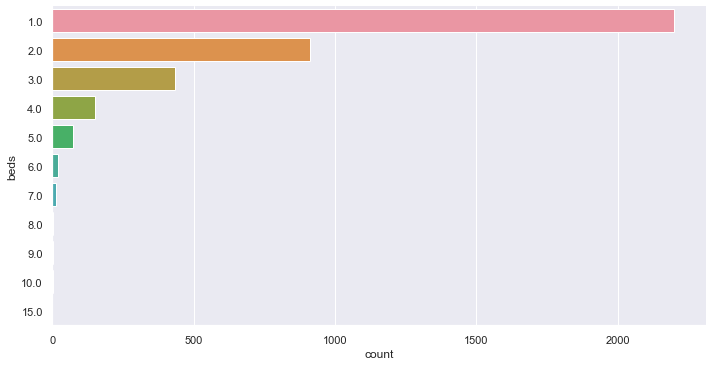

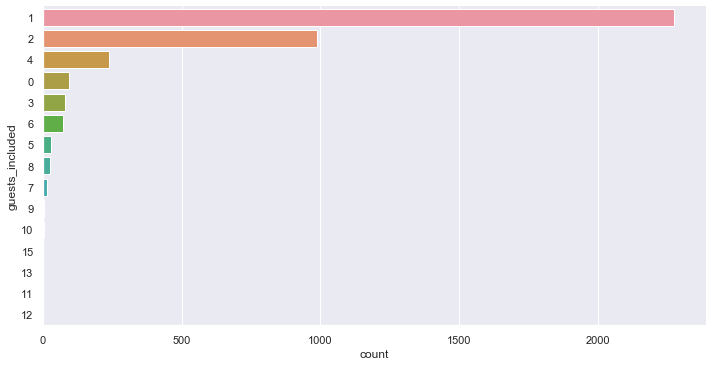

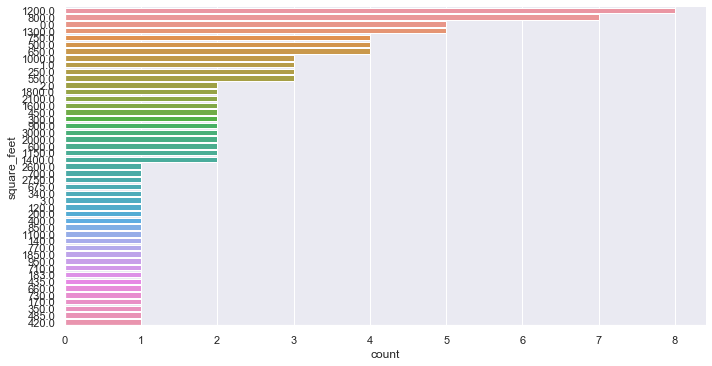

In [36]:
sb.catplot(y = "accommodates", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['accommodates'].value_counts().index)
sb.catplot(y = "bathrooms", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['bathrooms'].value_counts().index)
sb.catplot(y = "bedrooms", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['bedrooms'].value_counts().index)
sb.catplot(y = "beds", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['beds'].value_counts().index)
sb.catplot(y = "guests_included", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['guests_included'].value_counts().index)
sb.catplot(y = "square_feet", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['square_feet'].value_counts().index)

# For the categorical part


In [37]:
#Check the distribution of Categorical and Text columns
listings.describe(include=["O"])

,Name,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,2699,3818,3818,3818,3641,3249,3818,3818,2786,2212,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,73,3818,1,3792,3477,3119,3742,1,2506,1994,...,1,1,984,321,1,1,2,3,2,2
top,Belltown,https://www.airbnb.com/rooms/9329068,4/1/2016,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,...,t,4/1/2016,21/9/2015,2/1/2016,f,WASHINGTON,f,strict,f,f
freq,234,1,3818,3,15,14,10,3818,17,39,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443


Check the levels of some important listing related features

In [38]:

cat_level=['property_type','room_type','bed_type','cancellation_policy']
[listings[c].value_counts() for c in cat_level]

[House              1733
 Apartment          1708
 Townhouse           118
 Condominium          91
 Loft                 40
 Bed & Breakfast      37
 Other                22
 Cabin                21
 Bungalow             13
 Camper/RV            13
 Boat                  8
 Tent                  5
 Treehouse             3
 Dorm                  2
 Chalet                2
 Yurt                  1
 Name: property_type, dtype: int64, Entire home/apt    2541
 Private room       1160
 Shared room         117
 Name: room_type, dtype: int64, Real Bed         3657
 Futon              74
 Pull-out Sofa      47
 Airbed             27
 Couch              13
 Name: bed_type, dtype: int64, strict      1417
 moderate    1251
 flexible    1150
 Name: cancellation_policy, dtype: int64]

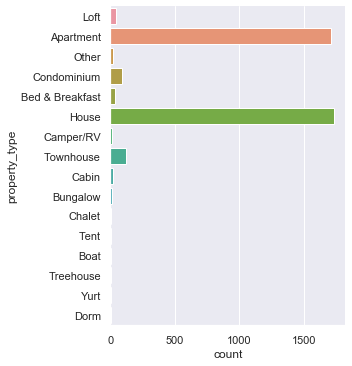

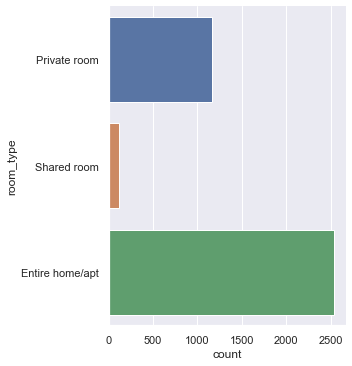

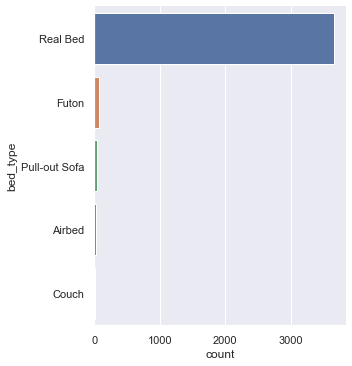

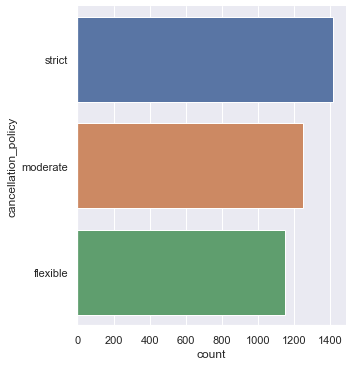

In [39]:
# Plot the important listing related features
for var in cat_level:
    sb.catplot(y = var, data = listings, kind = "count")

Check host_neighbourhood column which is an important property to locate each house.

In [40]:
# host_neighbourhood in the Dataset
print("Number of neighbourhood :", len(listings["host_neighbourhood"].unique()))


Number of neighbourhood : 103


Capitol Hill            405
Belltown                254
Ballard                 210
Minor                   191
Queen Anne              189
                       ... 
Long Beach                1
Manhattan Beach           1
Huntington Beach          1
Clairemont Mesa East      1
North College Park        1
Name: host_neighbourhood, Length: 102, dtype: int64


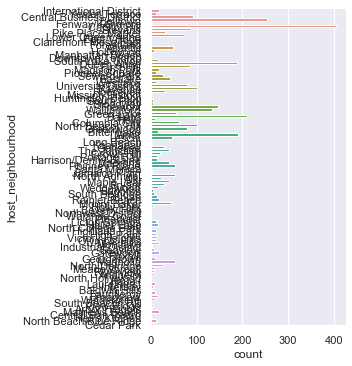

In [41]:
# Neighborhood numbers
print(listings["host_neighbourhood"].value_counts())
sb.catplot(y = "host_neighbourhood", data = listings, kind = "count")

# EDA Observations

1.Price has a positive skewed distribution. Mean=128, Median=100 and standard deviation 90.25. Also, there are some outliers may influence linear regression.

2.There are some useless columns like url which needs to be cleared up.

3.The number of people the AirBnb can accommodate, number of bathrooms, bedrooms and beds, guests included and housing size might have a strong linear relationship with price.

4.Each property has an average of 1.3 bedrooms(1 bedrooms is the most popular), 1.25 bathrooms(1 bathrooms is the most popular) and can accommodate an average of 3.3 guests(2 or 4 guests most commonly).

5.House and Apartment are the most popular property types .The remaining types account for a small percentage.

6.Entire room/apartment is the most popular room type present in 66% of listings.

7.There are a total of 103 neighborhoods in Seattle. Capitol Hill is the most popular neighborhood in terms of count of Airbnb listings



# There are two types of data, one is Categorical and the other is Numerical. Numerical data includes int64 and float64.
#Drop "host_id" "srape_id", these numerical data contains very big numerical value.¶

In [42]:
listings.drop(columns=[ 'host_id', 'scrape_id'], inplace=True)

# Check unbalanced data in every column, which only contains less than 4 unique values.(the columns contain 1 unique value has been dropped above)¶

In [43]:
listings_unbalanced = listings.loc[:,listings.apply(pd.Series.nunique) < 3]
listings_unbalanced = listings_unbalanced.drop(columns=['license'])
listings_unbalanced.head()

,last_scraped,experiences_offered,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,state,market,country_code,country,is_location_exact,has_availability,calendar_last_scraped,requires_license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,4/1/2016,none,100%,f,t,t,WA,Seattle,US,United States,t,t,4/1/2016,f,WASHINGTON,f,t,t
1,4/1/2016,none,100%,f,t,t,WA,Seattle,US,United States,t,t,4/1/2016,f,WASHINGTON,f,f,f
2,4/1/2016,none,100%,f,t,t,WA,Seattle,US,United States,t,t,4/1/2016,f,WASHINGTON,t,t,t
3,4/1/2016,none,100%,f,t,t,WA,Seattle,US,United States,t,t,4/1/2016,f,WASHINGTON,t,f,f
4,4/1/2016,none,100%,f,t,t,WA,Seattle,US,United States,t,t,4/1/2016,f,WASHINGTON,t,f,f


In [44]:
listings_unbalanced.columns
# get the numbers of row dynamically
row = int(len(listings_unbalanced.columns)/2)

IndexError: index 6 is out of bounds for axis 0 with size 6

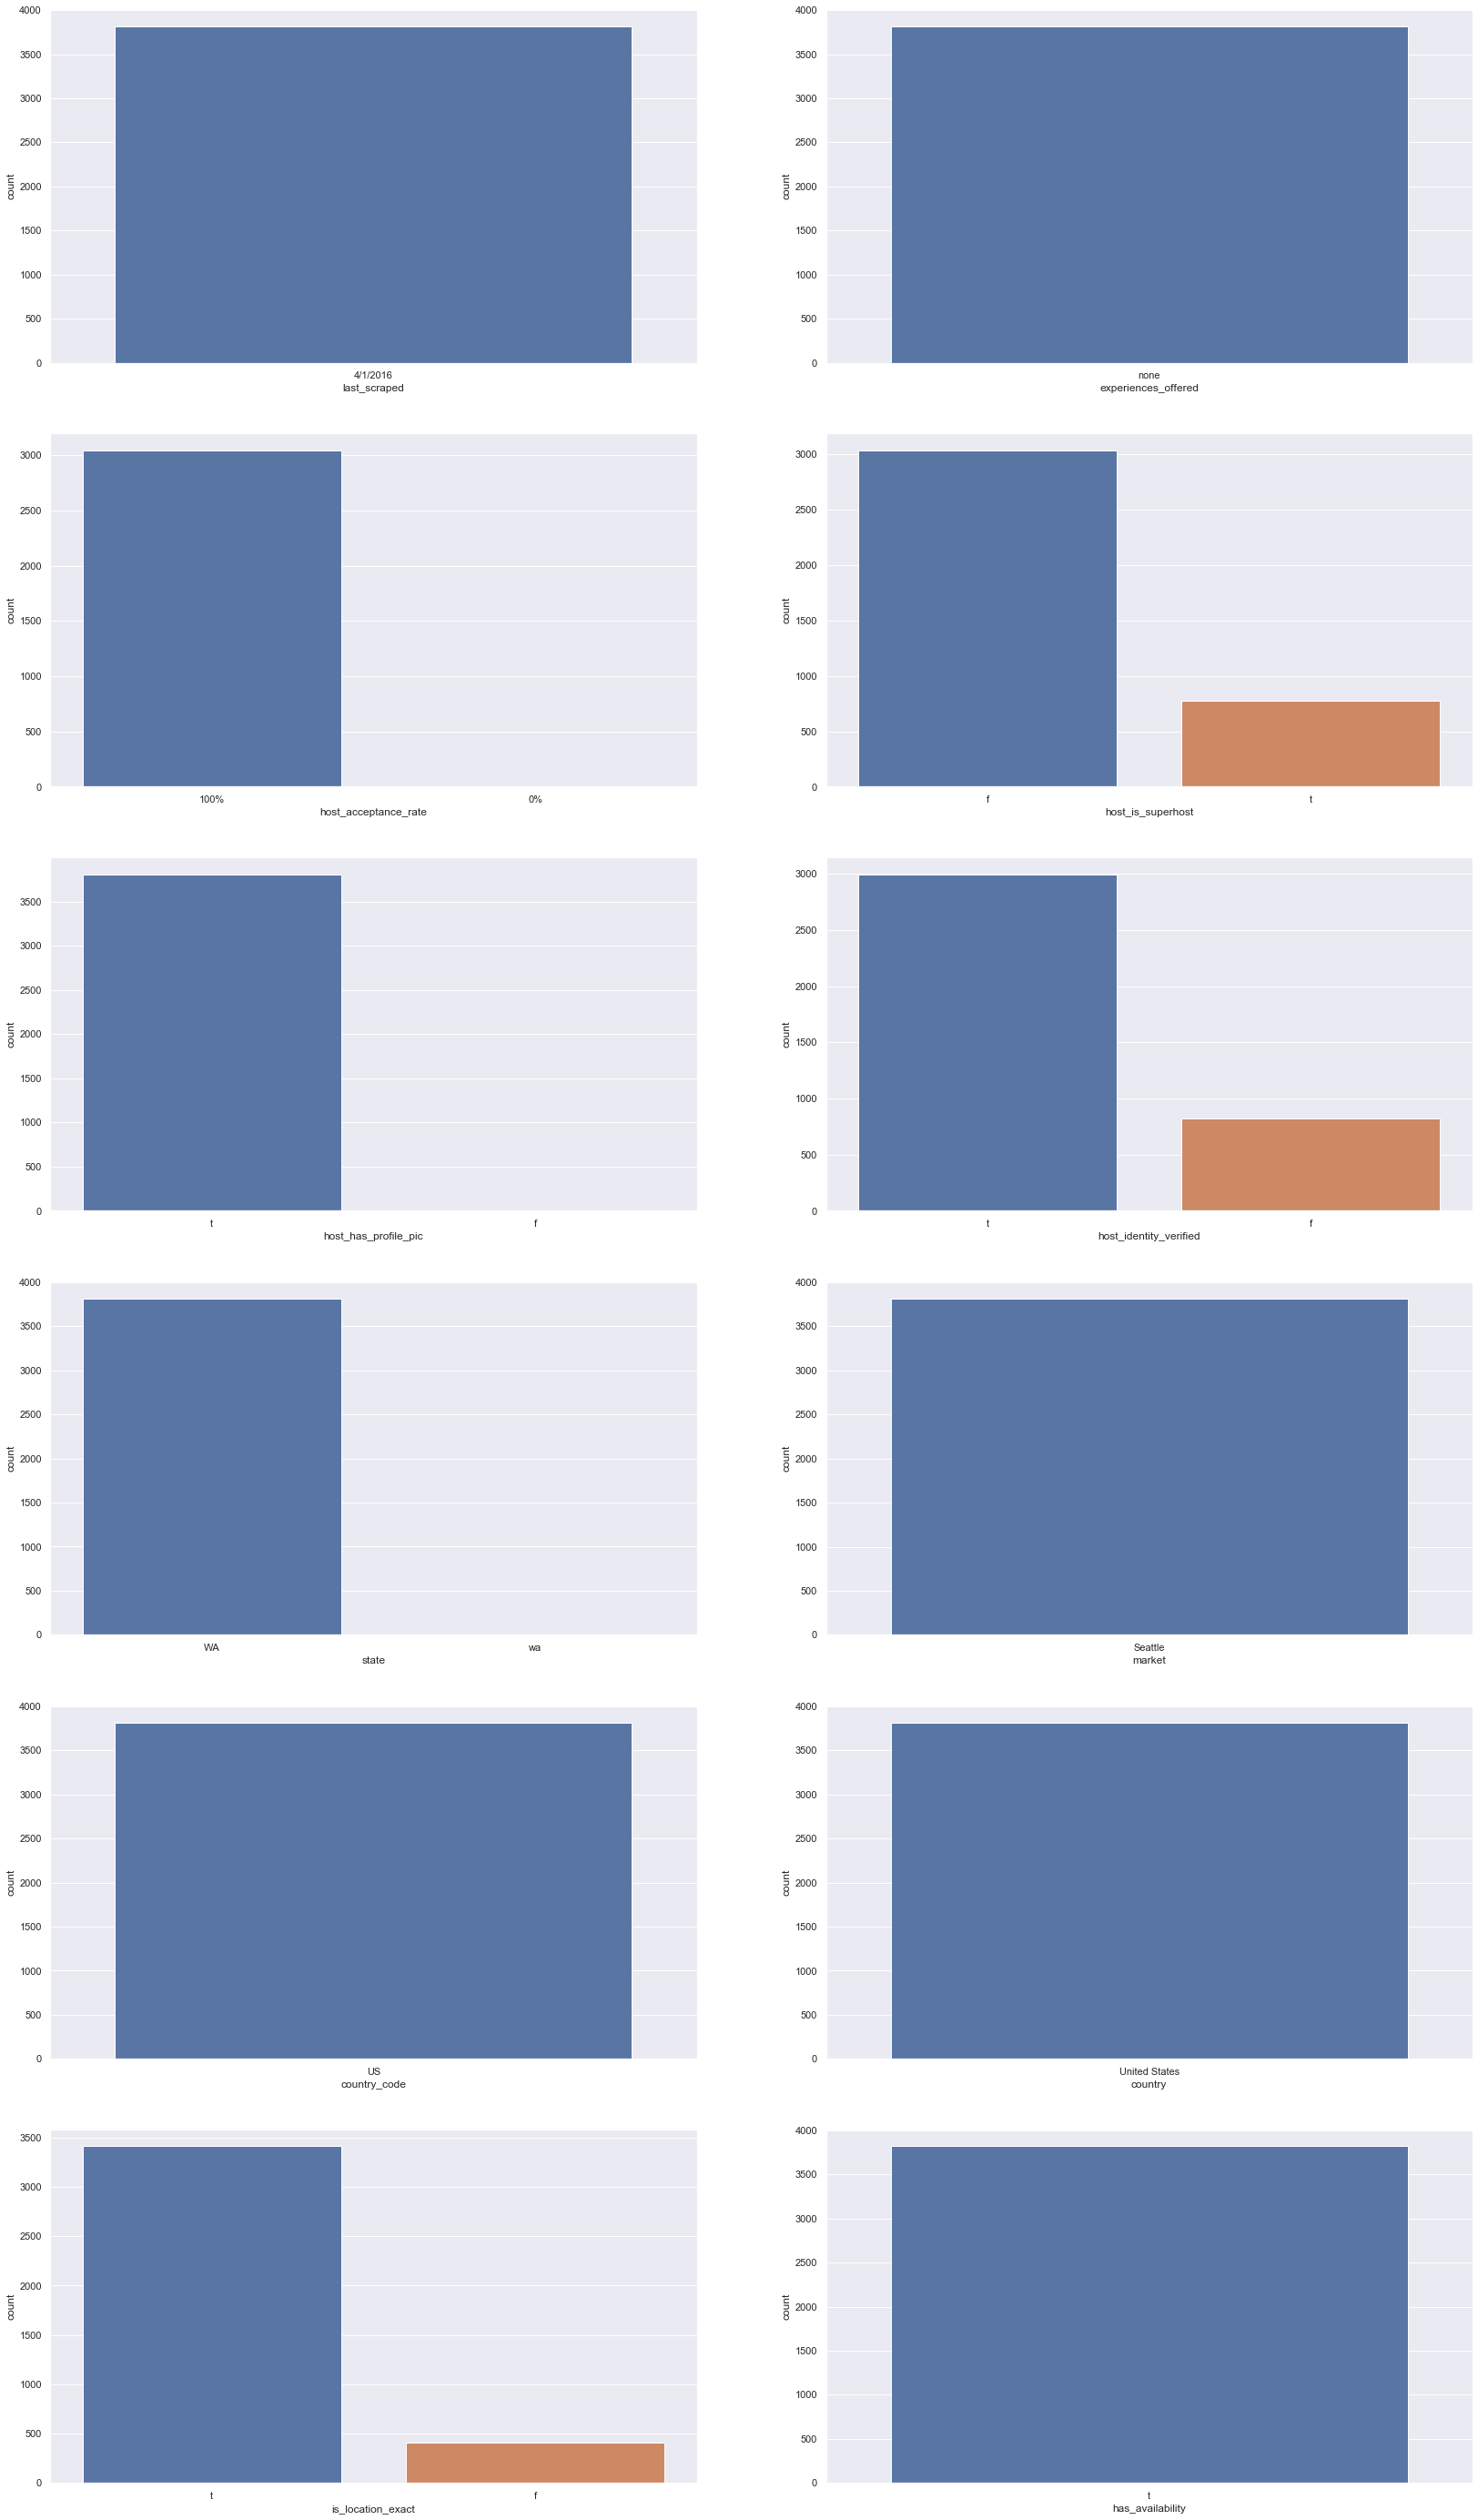

In [45]:
# If the column contains the same value,  that's invaluble data.
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
row = 6
col = 2
f, axes = plt.subplots(row, col, figsize=(28, 50))
row_count=0
col_count=0
for column in listings_unbalanced.columns:
    splot = sb.countplot(listings[column], ax = axes[row_count,col_count])
    col_count+=1
    if col_count > col-1:
        col_count=0
        row_count+=1
        
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext =     (0, 10), textcoords = 'offset points')

# Check the missing values in each column.¶

In [47]:
# Function to show the columns with missing values in descending order.
def show_missing_values(df):
    missing_vals = pd.DataFrame()
    filtered_predicator = []
    missing_vals['amount'] = df.isnull().sum().sort_values(ascending = False)
    missing_vals['ratio'] = round(missing_vals['amount']/len(df),2)
    return missing_vals[missing_vals['amount']>0].dropna()

In [48]:
show_missing_values(listings)

,amount,ratio
license,3818,1.00
square_feet,3721,0.97
monthly_price,2301,0.60
security_deposit,1952,0.51
weekly_price,1809,0.47
notes,1606,0.42
Rank#,1119,0.29
Population,1119,0.29
Name,1119,0.29
Walk Score,1119,0.29


# Because our dataset only has 3818 rows, which is a quite small dataset. To keep data integrated, we only filter off those columns with more than 30% missing values.¶

In [49]:
# add columns with the ratio is over 0.3 to a list for later use.
series = show_missing_values(listings).iloc[:,1]
many_missings = [x for x, y in series.items() if y > 0.30]
many_missings

['license',
 'square_feet',
 'monthly_price',
 'security_deposit',
 'weekly_price',
 'notes']

In [50]:
listings = listings.drop(columns = many_missings)

# Collect all categorical data into a list called categorical_data.
Collect all numerical data into a list called numerical_data.

In [51]:
numerical_data = []
categorical_data = []
for column in listings.columns:
    if listings[column].dtype == "object":
        categorical_data.append(column)
    else:
        numerical_data.append(column)

In [52]:
listings.describe()

,Rank#,Walk Score,Transit Score,Bike Score,Population,id,host_listings_count,host_total_listings_count,latitude,longitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,28.955910,79.421638,64.925157,73.129307,9906.099296,5.550111e+06,7.157757,7.157757,47.628961,-122.333103,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,22.081372,14.241330,17.467527,9.892339,5270.867932,2.962660e+06,28.628149,28.628149,0.043052,0.031745,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,2.000000,35.000000,34.000000,32.000000,529.000000,3.335000e+03,1.000000,1.000000,47.505088,-122.417219,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,11.000000,73.000000,54.000000,68.000000,6225.000000,3.258256e+06,1.000000,1.000000,47.609418,-122.354321,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,24.000000,82.000000,62.000000,75.000000,9294.000000,6.118244e+06,1.000000,1.000000,47.623601,-122.328874,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,41.000000,90.000000,72.000000,79.000000,11994.000000,8.035127e+06,3.000000,3.000000,47.662694,-122.310800,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,85.000000,98.000000,100.000000,88.000000,26712.000000,1.034016e+07,502.000000,502.000000,47.733358,-122.240607,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


# Check the missing values of all numerical data

In [53]:
show_missing_values(listings[numerical_data])

,amount,ratio
Rank#,1119,0.29
Population,1119,0.29
Walk Score,1119,0.29
Transit Score,1119,0.29
Bike Score,1119,0.29
review_scores_checkin,658,0.17
review_scores_accuracy,658,0.17
review_scores_value,656,0.17
review_scores_location,655,0.17
review_scores_cleanliness,653,0.17


# Check the missing values of all categorical data

In [54]:
show_missing_values(listings[categorical_data])

,amount,ratio
Name,1119,0.29
neighborhood_overview,1032,0.27
cleaning_fee,1030,0.27
transit,934,0.24
host_about,859,0.22
host_acceptance_rate,773,0.20
last_review,627,0.16
first_review,627,0.16
space,569,0.15
host_response_rate,523,0.14


# Filling in the missing values
#KNN-based Missing Value Imputation for numerical data
#Using most-frequent values of the column to fill in the missing values of categorical data

In [55]:

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
imp_numerical = KNNImputer(missing_values=np.nan, n_neighbors=3)
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

listings[numerical_data] = imp_numerical.fit_transform(listings[numerical_data])
listings[categorical_data] = imp_categorical.fit_transform(listings[categorical_data])

ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (D:\jupyter notebook\lib\site-packages\sklearn\impute\__init__.py)

In [56]:
#observe there are several comlumns with blanks
#Blank missing values in Amenities column
#It means that we filled missing values with "", so in the next few steps, we can took them as False(False means there is no amenities)
listings.loc[listings['amenities'] == '{}','amenities'] = ""

In [57]:
listings['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
1    {TV,Internet,"Wireless Internet","Wheelchair A...
2    {Internet,"Wireless Internet",Kitchen,"Free Pa...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {TV,Internet,"Wireless Internet",Kitchen,Break...
Name: amenities, dtype: object

In [58]:
#Remove comma and citation symbols and split the amenities with \\\as separator 
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|||".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))

In [59]:
listings['amenities'].head()

0    TV|||Cable TV|||Internet|||Wireless Internet||...
1    TV|||Internet|||Wireless Internet|||Wheelchair...
2    Internet|||Wireless Internet|||Kitchen|||Free ...
3    TV|||Internet|||Wireless Internet|||Air Condit...
4    TV|||Internet|||Wireless Internet|||Kitchen|||...
Name: amenities, dtype: object

In [60]:
#Take the unique list of amenities across all listings. Express it as an array for future use
#if the amentity appears, it will be in the quotation symbol
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|||")).values))
amenities

array(['', '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype='<U26')

In [61]:
#Map the presence or absence of amenities for each listing
#True for having this amentit y, False for not having this amentity
#Therefore, for those rows without values, all should be False, because they don't have any one of these amenities.
amenities_matrix = np.array([listings['amenities'].map(lambda amns: amn in amns).values for amn in amenities])
amenities_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [62]:
#Make the amenities dataframe with boolean values
#True for having this amentity, False for not having this amentity
amen=pd.DataFrame(data=amenities_matrix.T, columns=amenities)
amen.head()

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,True,True,False,False,False,True,True,False,False,False,...,True,True,True,False,False,True,False,False,False,True
1,True,False,False,False,False,False,True,True,True,False,...,False,True,True,False,False,True,True,False,True,True
2,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,True,False,True,True,True,False,False,True,True,False,...,True,False,True,False,True,True,False,False,False,True
4,True,False,False,True,True,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True


In [63]:
#Concat the listing id to amen dataframe for further concatation
listings_amenities = pd.concat([listings['id'],amen], axis=1)
listings_amenities.head()

,id,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,365550,True,True,False,False,False,True,True,False,False,...,True,True,True,False,False,True,False,False,False,True
1,7777381,True,False,False,False,False,False,True,True,True,...,False,True,True,False,False,True,True,False,True,True
2,1778989,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,5031285,True,False,True,True,True,False,False,True,True,...,True,False,True,False,True,True,False,False,False,True
4,5031383,True,False,False,True,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True


In [64]:
#Remove second column from listings_amenities whose name is ""
listings_amenities=listings_amenities.drop("",axis=1)
listings_amenities.head()

,id,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,365550,True,False,False,False,True,True,False,False,False,...,True,True,True,False,False,True,False,False,False,True
1,7777381,False,False,False,False,False,True,True,True,False,...,False,True,True,False,False,True,True,False,True,True
2,1778989,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,5031285,False,True,True,True,False,False,True,True,False,...,True,False,True,False,True,True,False,False,False,True
4,5031383,False,False,True,True,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True


In [65]:
#Group some amentities with similar features and name them as a new column.
amenity_recode={
                'Air Conditioning':'Weather Control',
                'Indoor Fireplace':'Weather Control',
                'Heating':'Weather Control',
        
                'Carbon Monoxide Detector':'Safety Features',
                'Fire Extinguisher':'Safety Features',
                'First Aid Kit':'Safety Features',
                'Smoke Detector':'Safety Features',
                
                'Buzzer/Wireless Intercom':'Security Features',
                'Doorman':'Security Features',
                'Safety Card':'Security Features',
                'Lock on Bedroom Door':'Security Features',
                
                'Cat(s)':'Pet Friendly',
                'Dog(s)':'Pet Friendly',
                'Pets Allowed':'Pet Friendly',
                'Pets live on this property':'Pet Friendly',
                'Other pet(s)':'Pet Friendly',
                
                'Elevator in Building':'Access Friendly',
                'Wheelchair Accessible':'Access Friendly',
                
                'Essentials':'Essentials',
                'Hair Dryer':'Essentials',
                'Hangers':'Essentials',
                'Iron':'Essentials',
                'Shampoo':'Essentials',             
                
                'Cable TV':'TV',
                'TV':'TV',
                
                'Internet':'Internet',
                'Wireless Internet':'Internet',
                'Laptop Friendly Workspace':'Internet',
                
                'Dryer':'Laundry Facility',
                'Washer':'Laundry Facility',
                'Washer / Dryer':'Laundry Facility',
    
                #Leaving amenities as such which cannot be grouped
                #'Kitchen',
                #'Family/Kid Friendly', 
                #'Free Parking on Premises',
                #'Breakfast',
                #'24-Hour Check-in',
                #'Hot Tub',
                #'Pool',
                #'Gym',
                #'Smoking Allowed',
                #'Suitable for Events'
                #
}

In [66]:
#Melt the amenities dataframe and recode from the dictionary
listings_amenities_melt = listings_amenities.melt(id_vars=['id'], var_name='amenity')

#Recoding and putting in new column called amenity_modified
listings_amenities_melt = listings_amenities_melt.assign(
    amenity_modified = listings_amenities_melt.amenity.replace(amenity_recode)
)

listings_amenities_melt.head()

,id,amenity,value,amenity_modified
0,365550,24-Hour Check-in,True,24-Hour Check-in
1,7777381,24-Hour Check-in,False,24-Hour Check-in
2,1778989,24-Hour Check-in,False,24-Hour Check-in
3,5031285,24-Hour Check-in,False,24-Hour Check-in
4,5031383,24-Hour Check-in,False,24-Hour Check-in


In [67]:
#Pivot the melted dataframe before merging with original dataframe
listings_amenities_pivot = listings_amenities_melt.pivot_table(
    index='id',
    columns='amenity_modified',
    values='value', 
    aggfunc='max'
)

listings_amenities_pivot.head()

amenity_modified,24-Hour Check-in,Access Friendly,Breakfast,Essentials,Family/Kid Friendly,Free Parking on Premises,Gym,Hot Tub,Internet,Kitchen,Laundry Facility,Pet Friendly,Pool,Safety Features,Security Features,Smoking Allowed,Suitable for Events,TV,Weather Control
id,,,,,,,,,,,,,,,,,,,
3335,False,False,False,False,True,True,False,False,True,True,True,True,False,True,False,False,False,False,True
4291,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,True,True
5682,True,False,False,True,False,False,False,False,True,True,True,False,False,True,False,False,False,True,True
6606,False,False,False,True,False,True,False,True,True,True,False,True,False,False,False,False,False,True,True
7369,False,True,False,True,False,False,False,False,True,True,True,False,False,True,False,False,False,True,True


In [68]:
#Join the amenities dataframe back to the original listings dataframe
listings=listings.join(listings_amenities_pivot,on="id",how="inner")
listings.head()

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population,id,listing_url,last_scraped,name,...,Kitchen,Laundry Facility,Pet Friendly,Pool,Safety Features,Security Features,Smoking Allowed,Suitable for Events,TV,Weather Control
0,2.0,International District,98.0,100.0,80.0,3396.0,365550,https://www.airbnb.com/rooms/365550,4/1/2016,contemporary art loft downtown [17],...,True,True,False,False,True,True,False,False,True,True
1,2.0,International District,98.0,100.0,80.0,3396.0,7777381,https://www.airbnb.com/rooms/7777381,4/1/2016,Privacy & gorgeous panoramic views!,...,True,True,True,False,True,False,False,False,True,True
2,2.0,International District,98.0,100.0,80.0,3396.0,1778989,https://www.airbnb.com/rooms/1778989,4/1/2016,Ensuite Queen Bed Cap Hill Apt,...,True,True,True,False,False,True,False,False,False,True
3,2.0,International District,98.0,100.0,80.0,3396.0,5031285,https://www.airbnb.com/rooms/5031285,4/1/2016,Shared Space Main Temple Hondo,...,True,False,True,False,True,True,False,True,True,True
4,2.0,International District,98.0,100.0,80.0,3396.0,5031383,https://www.airbnb.com/rooms/5031383,4/1/2016,Shared Space Main Temple Hondo 2nd,...,True,False,True,False,True,True,False,False,True,False


In [69]:
#Make sure there is no missing value in several amentity columns
show_missing_values(listings)

,amount,ratio
Rank#,1119,0.29
Name,1119,0.29
Walk Score,1119,0.29
Transit Score,1119,0.29
Bike Score,1119,0.29
Population,1119,0.29
neighborhood_overview,1032,0.27
cleaning_fee,1030,0.27
transit,934,0.24
host_about,859,0.22


In [70]:
listings.drop(columns=[ 'id','amenities'], inplace=True)

 Convert the columns contain $" from categorical data into numerical data.
Such as price, cleaning_fee, extra_people

In [71]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
listings['extra_people'] = listings['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [72]:
def preprocess(df):
    temp_df = df.copy()
    temp_df = temp_df.replace(
            {
            'host_has_profile_pic': {'t': True, 'f': False},
            'host_identity_verified': {'t': True, 'f': False},
            'require_guest_profile_picture':{'t': True, 'f': False},
            'require_guest_phone_verification':{'t': True, 'f': False},
            'instant_bookable': {'t': True, 'f': False},
        #     'host_is_superhost':{'t': True, 'f': False}，
            'is_location_exact':{'t': True, 'f': False}	
            }
    )
    df = temp_df
    return df

In [73]:
listings = preprocess(listings)

Convert the columns contain "%" from categorical data into numerical data.
Such as host_response_rate, host_acceptance_rate

In [74]:
listings['host_response_rate'] = listings['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

# One hot encoding

In [75]:
numerical_data = []
categorical_data = []
for column in listings.columns:
    if listings[column].dtype =="bool":
        categorical_data.append(column)
    else:
        numerical_data.append(column)
print(categorical_data)
for item in categorical_data:
    print(item)

['is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', '24-Hour Check-in', 'Access Friendly', 'Breakfast', 'Essentials', 'Family/Kid Friendly', 'Free Parking on Premises', 'Gym', 'Hot Tub', 'Internet', 'Kitchen', 'Laundry Facility', 'Pet Friendly', 'Pool', 'Safety Features', 'Security Features', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Weather Control']
is_location_exact
instant_bookable
require_guest_profile_picture
require_guest_phone_verification
24-Hour Check-in
Access Friendly
Breakfast
Essentials
Family/Kid Friendly
Free Parking on Premises
Gym
Hot Tub
Internet
Kitchen
Laundry Facility
Pet Friendly
Pool
Safety Features
Security Features
Smoking Allowed
Suitable for Events
TV
Weather Control


In [76]:
categorical_data

['is_location_exact',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 '24-Hour Check-in',
 'Access Friendly',
 'Breakfast',
 'Essentials',
 'Family/Kid Friendly',
 'Free Parking on Premises',
 'Gym',
 'Hot Tub',
 'Internet',
 'Kitchen',
 'Laundry Facility',
 'Pet Friendly',
 'Pool',
 'Safety Features',
 'Security Features',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Weather Control']

In [77]:
def one_hot(arr):
# integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(arr)
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    print(i)
    # how to invert one-hot encoding for checking
    # inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    #print(inverted)
    return onehot_encoded



i=0
for item in categorical_data: #iterate all catogorical columns

    i=i+1
    data= pd.DataFrame(listings[item])
    values = array(data)

    arr=one_hot(values)
    listings[item]=arr


[1 1 1 ... 1 1 1]
1
[0 0 1 ... 0 0 0]
2
[1 0 1 ... 0 0 0]
3
[1 0 1 ... 0 0 0]
4
[1 0 0 ... 1 1 0]
5
[0 1 1 ... 0 0 0]
6
[0 0 0 ... 0 0 0]
7
[1 1 1 ... 1 1 1]
8
[0 0 1 ... 1 1 1]
9
[0 0 1 ... 1 1 1]
10
[0 1 0 ... 0 0 0]
11
[0 0 0 ... 0 0 0]
12
[1 1 1 ... 1 1 1]
13
[1 1 1 ... 1 1 1]
14
[1 1 1 ... 1 1 1]
15
[0 1 1 ... 0 0 1]
16
[0 0 0 ... 0 0 0]
17
[1 1 0 ... 1 1 1]
18
[1 0 1 ... 0 0 0]
19
[0 0 0 ... 0 0 0]
20
[0 0 0 ... 0 0 0]
21
[1 1 0 ... 1 1 0]
22
[1 1 1 ... 1 1 1]
23


In [78]:
listings

,Rank#,Name,Walk Score,Transit Score,Bike Score,Population,listing_url,last_scraped,name,summary,...,Kitchen,Laundry Facility,Pet Friendly,Pool,Safety Features,Security Features,Smoking Allowed,Suitable for Events,TV,Weather Control
0,2.0,International District,98.0,100.0,80.0,3396.0,https://www.airbnb.com/rooms/365550,4/1/2016,contemporary art loft downtown [17],** Please read our entire listing description ...,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2.0,International District,98.0,100.0,80.0,3396.0,https://www.airbnb.com/rooms/7777381,4/1/2016,Privacy & gorgeous panoramic views!,This beautiful apartment is all about location...,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,2.0,International District,98.0,100.0,80.0,3396.0,https://www.airbnb.com/rooms/1778989,4/1/2016,Ensuite Queen Bed Cap Hill Apt,LGBT are welcome. Private vintage-inspired roo...,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,2.0,International District,98.0,100.0,80.0,3396.0,https://www.airbnb.com/rooms/5031285,4/1/2016,Shared Space Main Temple Hondo,This is one folding cot in the main hall of th...,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,International District,98.0,100.0,80.0,3396.0,https://www.airbnb.com/rooms/5031383,4/1/2016,Shared Space Main Temple Hondo 2nd,This is one folding beds in the main hall of t...,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/2778101,4/1/2016,Dreamy Vintage Flat / 1000 sq. ft.,Located in one of the most walkable & desirabl...,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3814,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/10019082,4/1/2016,Spacious 1BR Capitol Hill Apartment,"This cozy 1 bedroom, 1 bathroom apartment is l...",...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/6586979,4/1/2016,The Aerodrome: Luxury 3bed/2.5bath,This airport-inspired modern home features: *...,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3816,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/9618016,4/1/2016,"Classic Home, Mid-City Neighborhood",This welcoming home is in the quiet residentia...,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
#listings_combined.to_csv('dataset_filter\listings_holiday_nScore2.csv',index=False)

Box plot all the numerical data